# DataCo SMART SUPPLY CHAIN FOR BIG DATA ANALYSIS
---
https://www.kaggle.com/datasets/shashwatwork/dataco-smart-supply-chain-for-big-data-analysis/data <br>
Constante, F., Silva, F., & Pereira, A. (2019). DataCo SMART Supply Chain for Big Data Analysis (Version 5) [Dataset]. Mendeley Data.<br>
metal3d. Countries coordinates with longitude and latitude (cleaned CSV dataset). GitHub Gist, 2017. Available at: https://gist.github.com/metal3d/5b925077e66194551df949de64e910f6 <br>
You can cite the GitHub dataset as follows:
Luke. ISO-3166 Countries with Regional Codes (all.csv). GitHub Repository, 2016–present. Available at: https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/blob/master/all/all.csv


# About Dataset
---
**Content** <br>
A DataSet of Supply Chains used by the company DataCo Global was used for the analysis. Dataset of Supply Chain , which allows the use of Machine Learning Algorithms and R Software.<br>
Areas of important registered activities : Provisioning , Production , Sales , Commercial Distribution.It also allows the correlation of Structured Data with Unstructured Data for knowledge generation.<br>

**Type Data** : <br>
Structured Data : DataCoSupplyChainDataset.csv <br>
Unstructured Data : tokenized_access_logs.csv (Clickstream) <br>

**Types of Products** : Clothing , Sports , and Electronic Supplies <br>

Additionally it is attached in another file called DescriptionDataCoSupplyChain.csv, the description of each of the variables of the DataCoSupplyChainDatasetc.csv <br>
with the country code data files, named continents2.csv and country-coord.csv.

# Challenge
---
The dataset lacks explicit Unit Cost and Freight columns, <br>
I decided to uses Median Cost Lookups for COGS and a Gradient Boosting Model (gb_fr) to predict shipping fees based on distance. <br>
Essentially, it simulates a "Landed Cost" (Cost + Freight) to provide theoretical profit margins when real financial records are missing.

# Key headers:
---

- [Data Import and Wrangling](#DATA-IMPORT-AND-WRANGLING)
  
- [Exploratory Data Analysis](#EDA)

- [Feature Engineering](#FEATURE-ENGINEERING)

- [Visualization](#VISUALIZATION)
  
- [Model Evaluation](#MODEL-EVALUATION)

- [Model Implementation](#MODEL-IMPLEMENTATION)

- [Conclusion](#CONCLUSION)
  
- [Citation](#CITATION)

# Business Context
---

The **Business Aspect** framework organizes supply chain considerations into five dimensions: *Who, What, When, Where, and Why*. Each dimension provides clarity on stakeholders, problems, timing, scope, and objectives.

#### WHO
This dimension identifies the stakeholders involved in supply chain operations:
- **Industry participants:** Manufacturers, distributors, and retailers.  
- **Internal teams:** Supply chain, logistics, finance, sales, and executive management.  
- **External partners:** Suppliers, carriers, and distribution partners.  
Together, these actors form the ecosystem that influences efficiency, cost, and service levels.

#### WHAT
This dimension defines the issues and analytical focus:
- Identifying patterns that lead to transportation delays, high freight costs, and negative margins.  
- Analyzing profit ratios and product trends to assess financial performance.  
- Highlighting inefficient routes that increase operational costs.  
It emphasizes the need to uncover inefficiencies and opportunities for improvement.

#### WHEN
This dimension situates problems within a temporal context:
- Based on historical order, freight, and sales data across multiple years.  
- Issues typically arise during order fulfillment, shipping, and delivery cycles.  
- New product launches or distribution center (DC) implementations often trigger additional challenges.  
It underscores the importance of analyzing both past data and current operational cycles.

#### WHERE
This dimension specifies the geographic and categorical scope:
- Across distribution routes, customer segments, and product categories.  
- Special focus on high-cost lanes and low-margin product flows.  
It highlights the areas where inefficiencies are most concentrated and where corrective action is most impactful.

#### WHY
This dimension explains the strategic objectives:
- **Margin improvement:** Enhancing profitability by reducing costs and inefficiencies.  
- **Reliable on-time delivery:** Ensuring customer satisfaction and trust.  
- **Stable and predictable freight costs:** Supporting financial planning and operational stability.  
It connects operational analysis to overarching business goals.


# Business Problem
---
The **Business Problem** slide highlights the central challenge of balancing transportation efficiency, cost-to-serve, and customer satisfaction. It frames the issue around a guiding question and three major problem areas.

## **How can we reduce transportation delays and cost-to-serve while improving delivery reliability and customer satisfaction?**  
This question establishes the strategic focus: achieving operational efficiency without compromising service quality.


#### 1. Negative Profitability Margin
- **Observation:** 19% of total orders show a negative profit margin.  
- **Implication:** Cost-to-serve inefficiencies are eroding profitability.  
- **Analytical Focus:** Identify which products, customers, or routes contribute disproportionately to losses and redesign pricing or logistics strategies.


#### 2. Delivery Delays
- **Unpredictable lead times:** Variability in order-to-delivery cycles undermines reliability.  
- **Route-level variability:** Certain transportation routes consistently perform worse, creating bottlenecks.  
- **Shipping class inconsistency:** Differences in service levels (e.g., standard vs. expedited) cause uneven customer experiences.  
- **Analytical Focus:** Pinpoint delay drivers and standardize processes to ensure predictable delivery performance.


#### 3. Unstable Freight Cost
- **Observation:** Freight costs vary significantly across routes and shipping modes.  
- **Implication:** This inconsistency makes it difficult to forecast the true cost-to-serve.  
- **Analytical Focus:** Develop cost models that account for variability and negotiate stable contracts with carriers to reduce unpredictability.

---

# DATA IMPORT AND WRANGLING
---
[Home](#About-Dataset)
- Import Dataset and Country location file

[Next](#EDA)


In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as mtick
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px

In [ ]:
df = pd.read_csv('C:/Users/smilesimile/Downloads/DATA-20250820T135424Z-1-001/DATA/DataCoSupplyChainDataset.csv', encoding='latin-1')
desc = pd.read_csv('C:/Users/smilesimile/Downloads/DATA-20250820T135424Z-1-001/DATA/DescriptionDataCoSupplyChain.csv', encoding='latin-1')
country = pd.read_csv('C:/Users/smilesimile/Downloads/DATA-20250820T135424Z-1-001/DATA/continents2.csv')
country_ll = pd.read_csv('C:/Users/smilesimile/Downloads/DATA-20250820T135424Z-1-001/DATA/country-coord.csv')

#### Variable

In [ ]:
desc

In [ ]:
print(desc.iloc[39, -1])
print(desc.iloc[40, -1])
print(desc.iloc[6, -1])
print(desc.iloc[17, -1])

# EDA
---
[Home](#About-Dataset)


[Next](#FEATURE-ENGINERRING)


In [ ]:
df.head(1)

In [ ]:
df.columns = (
    df.columns
      .str.lower()
      .str.replace(r"[ \-]", "_", regex=True)
      .str.replace(r"[()]", "", regex=True)
)

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df[['latitude','longitude']].head()

In [ ]:
country['name'].unique()

In [ ]:
pip install geopy

In [ ]:
country

In [ ]:
country.columns = [o.replace('-', '_') for o in country.columns.str.lower()]

In [ ]:
country_corrections = {
    "Japón": "Japan",
    "Corea del Sur": "South Korea",
    "Singapur": "Singapore",
    "Turquía": "Turkey",
    "Estados Unidos": "United States",
    "República Democrática del Congo": "Congo (Democratic Republic Of The)",
    "Marruecos": "Morocco",
    "Alemania": "Germany",
    "Francia": "France",
    "Países Bajos": "Netherlands",
    "Reino Unido": "United Kingdom",
    "Panamá": "Panama",
    "República Dominicana": "Dominican Republic",
    "Brasil": "Brazil",
    "México": "Mexico",
    "Perú": "Peru",
    "Sudán": "Sudan",
    "Costa de Marfil": "Côte D'Ivoire",
    "Egipto": "Egypt",
    "Italia": "Italy",
    "España": "Spain",
    "Suecia": "Sweden",
    "Níger": "Niger",
    "SudAfrica": "South Africa",
    "Ruanda": "Rwanda",
    "Nueva Zelanda": "New Zealand",
    "Bangladés": "Bangladesh",
    "Tailandia": "Thailand",
    "Irak": "Iraq",
    "Arabia Saudí": "Saudi Arabia",
    "Kazajistán": "Kazakhstan",
    "Irán": "Iran",
    "Myanmar (Birmania)": "Myanmar",
    "Uzbekistán": "Uzbekistan",
    "Benín": "Benin",
    "Camerún": "Cameroon",
    "Kenia": "Kenya",
    "Ucrania": "Ukraine",
    "Polonia": "Poland",
    "Rumania": "Romania",
    "Trinidad y Tobago": "Trinidad and Tobago",
    "Afganistán": "Afghanistan",
    "Pakistán": "Pakistan",
    "Finlandia": "Finland",
    "Rusia": "Russia",
    "Irlanda": "Ireland",
    "Noruega": "Norway",
    "Eslovaquia": "Slovakia",
    "Bélgica": "Belgium",
    "Etiopía": "Ethiopia",
    "Kirguistán": "Kyrgyzstan",
    "Emiratos Árabes Unidos": "United Arab Emirates",
    "Lituania": "Lithuania",
    "Suiza": "Switzerland",
    "Hungría": "Hungary",
    "Dinamarca": "Denmark",
    "Haití": "Haiti",
    "Bielorrusia": "Belarus",
    "Baréin": "Bahrain",
    "República Checa": "Czech Republic",
    "Zimbabue": "Zimbabwe",
    "Libia": "Libya",
    "Tayikistán": "Tajikistan",
    "Siria": "Syria",
    "Papúa Nueva Guinea": "Papua New Guinea",
    "Azerbaiyán": "Azerbaijan",
    "Turkmenistán": "Turkmenistan",
    "Jordania": "Jordan",
    "Moldavia": "Moldova",
    "República del Congo": "Congo",
    "Bosnia y Herzegovina": "Bosnia And Herzegovina",
    "Omán": "Oman",
    "Túnez": "Tunisia",
    "Sierra Leona": "Sierra Leone",
    "Yibuti": "Djibouti",
    "Gabón": "Gabon",
    "Sudán del Sur": "South Sudan",
    "Luxemburgo": "Luxembourg",
    "Grecia": "Greece",
    "Suazilandia": "Eswatini",
    "Guayana Francesa": "French Guiana",
    "República Centroafricana": "Central African Republic",
    "Taiwán": "Taiwan",
    "Líbano": "Lebanon",
    "Chipre": "Cyprus",
    "Surinam": "Suriname",
    "República de Gambia": "Gambia",
    "Botsuana": "Botswana",
    "Guinea Ecuatorial": "Equatorial Guinea",
    "Bután": "Bhutan",
    "Sáhara Occidental": "Western Sahara",
    "Argelia": "Algeria",
    "Filipinas": "Philippines",
    "Malasia": "Malaysia",
    "Camboya": "Cambodia",
    "Lesoto": "Lesotho",
    "Croacia": "Croatia",
    "Guadalupe": "Guadeloupe",
    "Martinica": "Martinique",
    "Guinea-Bissau": "Guinea Bissau",
    "Belice": "Belize",
    "Eslovenia": "Slovenia"
}

In [ ]:
df['order_country'] = df['order_country'].replace(country_corrections)

In [ ]:
country_ll = country_ll.rename(columns={
    "Country": "country",
    "Alpha-3 code": "alpha_3",
    "Latitude (average)": "dest_lat",
    "Longitude (average)": "dest_lon"
})
country_ll

In [ ]:
columns_to_merge = ['name', 'alpha_2', 'alpha_3', 'country_code','region']
df = df.merge(country[columns_to_merge], left_on='order_country', right_on='name', how='left')



In [ ]:
columns_to_merge_ll = ['alpha_3', 'dest_lat', 'dest_lon']
df = df.merge(country_ll[columns_to_merge_ll], on='alpha_3', how='left')

In [ ]:
df["latitude_r"] = df["latitude"].round(6)
df["longitude_r"] = df["longitude"].round(6)

In [ ]:
origins = df[["latitude_r", "longitude_r"]].drop_duplicates().reset_index(drop=True)

In [ ]:
def nearest_alpha3(lat, lon, country_ll):
    d = (country_ll["dest_lat"] - lat)**2 + (country_ll["dest_lon"] - lon)**2
    idx = d.idxmin()
    return country_ll.loc[idx, "alpha_3"]

In [ ]:
origins["origin_alpha_3"] = origins.apply(
    lambda r: nearest_alpha3(r["latitude_r"], r["longitude_r"], country_ll),
    axis=1
)

In [ ]:
df = df.merge(
    origins,
    on=["latitude_r", "longitude_r"],
    how="left",
    validate="many_to_one"   # <-- THIS prevents accidental doubling
)
df["origin_alpha_3"].unique()

In [ ]:
alpha3_to_name = dict(zip(country_ll["alpha_3"], country_ll["country"]))
df["origin_country_name"] = df["origin_alpha_3"].map(alpha3_to_name)

# FEATURE ENGINEERING
---
[Home](#About-Dataset)
- Destination [Clustering](#Clustering) (KMeans)
- [Seasonal calculation](#Seasonal-calculation)
- [Cost Calculation](#Cost-Calculation)
- [Indicator Calculation](#Indicator-Calculation)
- [Safety Stock and Inventory Re-order point](#Safety-Stock-and-Inventory-Re-order-point)

[Next](#VISUALIZATION)

# Clustering
[FEATURE ENGINEERING](#FEATURE-ENGINEERING) <br>

- Applies silhouette_score to identify best number of cluster
- Implement final number of cluster with KMeans


[Next](#Seasonal-calculation)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
# Prepare data (Sample for speed, Full for final assignment)
X_rad_sample = np.radians(df[['dest_lat', 'dest_lon']].sample(frac=0.2, random_state=42))
X_rad_full = np.radians(df[['dest_lat', 'dest_lon']]) # <--- ADD THIS
k_values = range(2, 6)

inertias = []
sil_scores = []

# Loop (Runs on SAMPLE to save time)
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42) # Lower n_init for speed
    labels = kmeans.fit_predict(X_rad_sample)
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_rad_sample, labels))

# Determine best_k
best_k = k_values[np.argmax(sil_scores)]
print(f"Best k (silhouette): {best_k}")

# Final Clustering (Run on FULL data so the rows match)
final_kmeans = KMeans(n_clusters=best_k, n_init=20, random_state=42)
df['cluster'] = final_kmeans.fit_predict(X_rad_full) # <--- USE FULL DATA HERE

In [ ]:
# 1. Visualization of Elbow Method and Silhouette Score
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot Inertia (Elbow Method)
ax1.plot(k_values, inertias, marker='o', linestyle='-', color='b')
ax1.set_title("Elbow Method (Inertia)")
ax1.set_xlabel("Number of clusters ($k$)")
ax1.set_ylabel("Inertia")
ax1.grid(True)

# Plot Silhouette Score
ax2.plot(k_values, sil_scores, marker='o', linestyle='-', color='orange')
ax2.set_title("Silhouette Score by $k$")
ax2.set_xlabel("Number of clusters ($k$)")
ax2.set_ylabel("Silhouette Score")
ax2.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
fig = px.scatter_geo(
    df,
    lat="dest_lat",
    lon="dest_lon",
    color="cluster",
    hover_data=["dest_lat","dest_lon","cluster"],
    title="KMeans Clusters of Destinations (Geo Map)",
    opacity=0.4,
    projection="natural earth"
)

fig.update_traces(marker=dict(size=8))
fig.update_layout(width=900, height=600)
fig.show()

In [ ]:
region_dc = (
    df.groupby("cluster")[["dest_lat", "dest_lon"]]
      .mean()
      .reset_index()
)

region_dc["dc_alpha3"] = region_dc.apply(
    lambda r: nearest_alpha3(r["dest_lat"], r["dest_lon"], country_ll),
    axis=1
)

country_dc = (
    country_ll[["alpha_3", "dest_lat", "dest_lon", "country"]]
        .rename(columns={
            "alpha_3": "dc_alpha3",
            "dest_lat": "dc_lat",
            "dest_lon": "dc_lon",
            "country": "dc_country"
        })
)

region_dc = region_dc.merge(country_dc, on="dc_alpha3", how="left")

df = df.merge(
    region_dc[["cluster", "dc_lat", "dc_lon", "dc_alpha3", "dc_country"]],
    on="cluster", how="left"
)

In [ ]:
df['dc_country'].unique()

In [ ]:
unmatched = df[df['name'].isnull()]
unmatched['order_country'].unique()

In [ ]:
df[df['customer_state'].isin(['91732', '95758'])]

In [ ]:
df.loc[df['customer_state'].isin(['91732', '95758']), 'customer_state'] = 'CA'

In [ ]:
col_list = df.columns.tolist()
col_list

In [ ]:
df["route1"] = df["origin_alpha_3"] + "_" + df["alpha_3"]
df["route2"] = df["dc_alpha3"] + "_" + df["alpha_3"]

In [ ]:
lookup = (
    df.groupby("route2")["late_delivery_risk"]
      .median()
      .reset_index()
      .rename(columns={"late_delivery_risk": "late_delivery_risk_route2"})
)

In [ ]:
df = df.merge(lookup, on="route2", how="left")

In [ ]:
df["late_delivery_risk_route2"] = df["late_delivery_risk_route2"].fillna(0)

In [ ]:
df["route_flag"] = (df["route2"] != df["route1"]).astype(int)

In [ ]:
df['order_customer_id'].nunique()

In [ ]:
df[df['customer_country']=='Puerto Rico']['customer_state'].unique()

In [ ]:
# Loop through all object-type columns and print their unique values
for col in df.select_dtypes(include='object').columns:
    print(f"Column: {col}")
    print(df[col].unique())
    print("-" * 40)

In [ ]:
df.info()

In [ ]:
df['order_item_profit_ratio'].describe()

In [ ]:
df['customer_segment'].unique()

In [ ]:
print(df['customer_country'].unique())
df['customer_country'].value_counts(normalize=True)

In [ ]:
df.nunique()

#### Set DateTime format

In [ ]:
df['order_date_dateorders'] = pd.to_datetime(df['order_date_dateorders'], utc=True)
df['shipping_date_dateorders'] = pd.to_datetime(df['shipping_date_dateorders'], utc=True)

In [ ]:
df['order_date_dateorders'].describe()

## Seasonal calculation
[FEATURE ENGINEERING](#FEATURE-ENGINEERING) <br>
[Next](#Cost-Calculation)

In [ ]:
# Extract year and month
df['year'] = df['order_date_dateorders'].dt.year
df['month'] = df['order_date_dateorders'].dt.month

# Cyclical encoding for month (seasonality)
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

In [ ]:
df['year'].value_counts(normalize=True)

In [ ]:
df['order_date_dateorders'] = pd.to_datetime(df['order_date_dateorders'], utc=True)

cutoff_low  = pd.to_datetime('2015-01-01', utc=True)
cutoff_high = pd.to_datetime('2017-09-30', utc=True)

#df = df[
#    (df['order_date_dateorders'] >= cutoff_low) &
#    (df['order_date_dateorders'] <  cutoff_high)
#]

In [ ]:
# Work on a copy so the main df is untouched 
df_week = df.copy()

# Convert to datetime with timezone
df_week['order_date_dateorders'] = pd.to_datetime(df_week['order_date_dateorders'], utc=True)

# Apply date filters
cutoff_low  = pd.to_datetime('2015-01-01', utc=True)
cutoff_high = pd.to_datetime('2017-09-25', utc=True)

df_week = df_week[
    (df_week['order_date_dateorders'] >= cutoff_low) &
    (df_week['order_date_dateorders'] <  cutoff_high)
]

# Remove timezone (Prophet/Plotly compatibility)
df_week['order_date_dateorders'] = df_week['order_date_dateorders'].dt.tz_localize(None)

# Aggregate by week
weekly_sales = (
    df_week.groupby(df_week['order_date_dateorders'].dt.to_period('W'))['sales_per_customer']
           .sum()
           .reset_index()
)

# Convert Period → Timestamp (start of week)
weekly_sales['order_date_dateorders'] = weekly_sales['order_date_dateorders'].dt.start_time

# Remove the first week if too low 
cutoff = pd.to_datetime('2014-12-29')
weekly_sales = weekly_sales[weekly_sales['order_date_dateorders'] > cutoff]

fig = px.line(
    weekly_sales,
    x='order_date_dateorders',
    y='sales_per_customer',
    title='Total Weekly Sales',
)

fig.update_layout(
    width=1600,
    height=550,
    template='plotly_white',
    xaxis_title='Week',
    yaxis_title='Total Sales',
    xaxis=dict(
        tickformat='%Y-%m-%d',
        showgrid=True,
        tickangle=0
    ),
    yaxis=dict(showgrid=True),
    margin=dict(l=60, r=40, t=80, b=60)
)

fig.show()

#### Find freight cost 
##### Profit same
- order_profit_per_order	
- benefit_per_order
  
##### Price same
- order_item_product_price	
- product_price	
- sales	
- check_sales

# Cost Calculation
[FEATURE ENGINEERING](#FEATURE-ENGINEERING) <br>
[Next](#Indicator-Calculation)

In [ ]:
rows_desc = [47,42,1,2,6,3,31,32,35,37,36,38,39,48,34]
for r in rows_desc:
    print(f"Row {r}: {desc.iloc[r, 0]} ------------> {desc.iloc[r, 1]}")

In [ ]:
df.select_dtypes(include='number').columns.tolist()

In [ ]:
import matplotlib.pyplot as plt

# Categorise into 3 groups
def classify_profit(x):
    if x < 0:
        return 'Negative Profit'
    elif x == 0:
        return 'Zero Profit'
    else:
        return 'Positive Profit'

df['profit_flag'] = df['order_item_profit_ratio'].apply(classify_profit)

# Count values
counts = df['profit_flag'].value_counts()

# Ensure consistent order
labels = ['Negative Profit', 'Zero Profit', 'Positive Profit']
sizes = [counts.get(label, 0) for label in labels]

# Explode only the negative slice
explode = [0.12, 0, 0]

# Plot
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    explode=explode,
    startangle=140,
    textprops={'fontsize': 13}
)

plt.title("Proportion of Negative, Zero, and Positive Profit Ratio", fontsize=15)
plt.tight_layout()
plt.show()

In [ ]:
cost_filter = [
 'benefit_per_order',
 'order_country',
 'origin_country_name',
 'shipping_mode',
 'sales_per_customer',
 'order_item_discount',
 'order_item_discount_rate',
 'order_item_profit_ratio',
 'order_item_quantity',
 'sales',
 'order_item_total',
 'order_profit_per_order',
 'product_price',
 'product_name']

In [ ]:
cost = df[cost_filter]

In [ ]:
cost['check'] = cost['sales']/ cost['order_item_quantity']

In [ ]:
print(cost[cost['check'].round(2) != cost['product_price'].round(2)].shape)
print(cost[cost['benefit_per_order'].round(2) != cost['order_profit_per_order'].round(2)].shape)
print(cost[cost['sales_per_customer'].round(2) != cost['order_item_total'].round(2)].shape)
print(cost[(cost['sales_per_customer'].round(2)+cost['order_item_discount'].round(2)) != cost['sales'].round(2)].shape)

In [ ]:
ratio = (cost['sales_per_customer'] + cost['order_item_discount']).round(2) \
        / cost['sales'].round(2)

print(cost[(1 - ratio) < -0.01].shape)
print(cost[(1 - ratio) > 0.01].shape)

In [ ]:
cost['cost'] = cost['order_profit_per_order']/ cost['order_item_profit_ratio']

In [ ]:
cost['unit_cost'] = cost['cost'] / cost['order_item_quantity']

In [ ]:
cost_filter_up = [
 'order_country',
 'shipping_mode',
 'order_item_discount_rate',
 'order_item_profit_ratio',
 'order_profit_per_order',
 'order_item_discount',
 'sales_per_customer',
 'product_price',
 'order_item_quantity',
 'product_name',
 'cost',
 'unit_cost'
]

In [ ]:
cost_up = cost[cost_filter_up]

In [ ]:
print(cost_up[cost_up['order_item_profit_ratio'] == 0]['product_name'].nunique())

In [ ]:
cost_up[cost_up['order_item_quantity']>1]

In [ ]:
df['cost'] = df['order_profit_per_order']/ df['order_item_profit_ratio']

In [ ]:
df['cost'] = df['cost'].fillna(df['sales'])

In [ ]:
df[df['cost'].isna()==True]['order_item_profit_ratio']

In [ ]:
df[df['cost']<0]

In [ ]:
df['unit_cost'] = df['cost'] / df['order_item_quantity']


In [ ]:
df['route1']

In [ ]:
map_check = df[(df['origin_alpha_3']=='BHS') & (df['alpha_3']=='AUS')]

In [ ]:
map_cost = (
    map_check.groupby(['product_name','origin_alpha_3','dc_alpha3','dc_country', 'origin_country_name','alpha_3', 'order_country'])
      .agg(
          unit_cost_median=('unit_cost', 'median'),
          unit_cost_std=('unit_cost', 'std'),
          product_price=('product_price', 'max')
      )
      .reset_index()
)
map_cost['freight'] = map_cost['product_price'] - map_cost['unit_cost_median']
map_cost['freight_rate']  = map_cost['freight'] / map_cost['product_price']

In [ ]:
df['freight'] = df['product_price'] - df['unit_cost']
df['freight_rate']  = df['freight'] / df['product_price']

In [ ]:
plt.clf()

# Parameters
top_n = 20
min_count = 5
figsize_per_plot = (5, 4)
showfliers = False
order_by_median = True

df_filt = df[(df['order_item_quantity'] == 1) &
             (df['origin_country_name'] == 'Mexico')]

# Prepare data
cols_needed = ['order_country', 'product_name', 'shipping_mode', 'freight_rate']
df_plot = df_filt.loc[:, cols_needed].copy()

df_plot['freight_rate'] = pd.to_numeric(df_plot['freight_rate'], errors='coerce')
df_plot = df_plot.dropna(subset=['order_country', 'product_name', 'freight_rate', 'shipping_mode'])

# Filter to France + Australia
df_plot = df_plot[df_plot['order_country'].isin(['France', 'Australia'])].copy()

# Determine top N products
counts = df_plot['product_name'].value_counts()
top_products = [p for p in counts.head(top_n).index if counts[p] >= min_count]

# Optional ordering by median freight_rate
if order_by_median and top_products:
    medians = (
        df_plot[df_plot['product_name'].isin(top_products)]
        .groupby('product_name')['freight_rate']
        .median()
    )
    top_products = medians.sort_values(ascending=False).index.tolist()

# Summary
rows_used = df_plot[df_plot['product_name'].isin(top_products)].shape[0]
print(f"Top {len(top_products)} products selected (min_count={min_count}).")
print(f"Total rows used: {rows_used}")
print('-------Plot showing the freight rate distribution by shipping mode per one country one product-------')

# --- Plotting section: 4 graphs per row ---
sns.set_style('whitegrid')

num_products = len(top_products)
cols = 4
rows = (num_products + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4), squeeze=False)

for idx, product in enumerate(top_products):
    r = idx // cols
    c = idx % cols
    ax = axes[r][c]

    sub = df_plot[df_plot['product_name'] == product].copy()
    n = len(sub)

    # Keep shipping modes with >=2 rows
    mode_counts = sub['shipping_mode'].value_counts()
    valid_modes = mode_counts[mode_counts >= 2].index.tolist()
    valid_modes = sorted(valid_modes, key=lambda m: -mode_counts[m])

    sub = sub[sub['shipping_mode'].isin(valid_modes)]
    if sub.empty:
        ax.set_visible(False)
        continue

    # Boxplot
    sns.boxplot(
        x='shipping_mode',
        y='freight_rate',
        hue='order_country',
        data=sub,
        order=valid_modes,
        showfliers=showfliers,
        width=0.6,
        ax=ax,
        legend=False
    )

    # Stripplot
    sns.stripplot(
        x='shipping_mode',
        y='freight_rate',
        hue='order_country',
        data=sub,
        order=valid_modes,
        dodge=True,
        size=3,
        jitter=0.2,
        alpha=0.6,
        ax=ax,
        legend=False
    )

    countries = ", ".join(sorted(sub['order_country'].unique()))
    ax.set_title(f"{product} ({countries}, n={n})", fontsize=11)
    ax.set_xlabel("Shipping Mode")
    ax.set_ylabel("Freight Rate")
    ax.tick_params(axis='x', rotation=30)

# Hide unused subplots
for i in range(num_products, rows * cols):
    r = i // cols
    c = i % cols
    axes[r][c].set_visible(False)

# Single legend
fig.legend(title="Order Country", loc="upper right")

plt.tight_layout()
plt.show()

## Indicator Calculation

[FEATURE ENGINEERING](#FEATURE-ENGINEERING) <br>
[Next](#Safety-Stock-and-Inventory-Re-order-point)

#### Define Actual Lead Time (Days)

In [ ]:
df['day_leadtime'] = (df['shipping_date_dateorders'] - df['order_date_dateorders']).dt.days

In [ ]:
df['day_delay'] = df['days_for_shipment_scheduled'] - df['days_for_shipping_real']

In [ ]:
check_delay = df[df['day_delay'] < 0][['day_leadtime','day_delay','late_delivery_risk','days_for_shipment_scheduled','days_for_shipping_real']]

In [ ]:
ccc = check_delay[check_delay['day_leadtime'] != check_delay['days_for_shipping_real']]
ccc.nunique()

#### Define profitability class

In [ ]:
conditions = [
    df['order_item_profit_ratio'] >= 0.5,
    (df['order_item_profit_ratio'] > 0) & (df['order_item_profit_ratio'] < 0.5),
    df['order_item_profit_ratio'] == 0,
    df['order_item_profit_ratio'] < 0
]

choices = ['High', 'Standard', 'Non', 'Negative']

df['order_item_profit_group'] = np.select(conditions, choices, default='Unknown')

In [ ]:
df['order_item_profit_group'].value_counts(normalize=True)

#### Grouping Discount range

In [ ]:
df['order_item_discount_flag'] = df['order_item_discount_rate'].apply(
    lambda x: 0 if x == 0 else (1 if x <= 0.1 else 2)
)

In [ ]:
df['order_item_discount_flag'].value_counts(normalize=True)

#### Product order f vs Profit ratio

In [ ]:
df_cat = (
    df.groupby(['category_name','product_name'])
      .agg(
          order_id=('order_id', 'count'),
          order_item_profit_ratio=('order_item_profit_ratio', 'mean'),
          sales=('sales_per_customer', 'sum')
      )
      .reset_index()
      .sort_values('order_id', ascending=False)
).head(20)
df_cat

## Safety Stock and Inventory Re-order point
[FEATURE ENGINEERING](#FEATURE-ENGINEERING) <br>

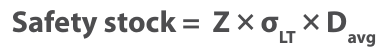
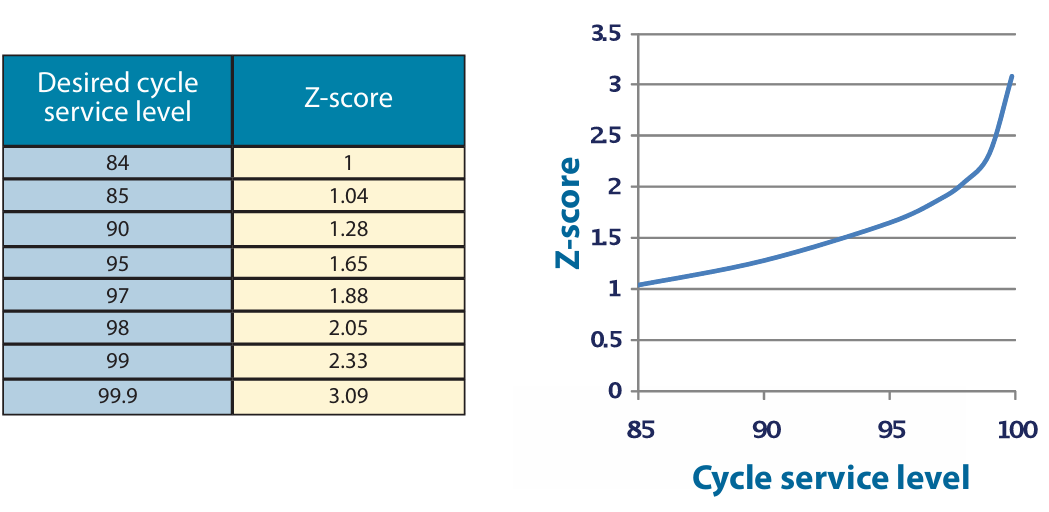



[Next](#VISUALIZATION)

In [ ]:
product_plan = (
    df
    .groupby(['product_name','dc_country'])
    .agg(
        avg_dsales=('sales_per_customer', 'mean'),
        std_day_leadtime=('day_leadtime', 'std'),
        quantity=('order_item_quantity', 'mean'),
        order_count=('order_id', 'nunique'),
        year_count=('year', 'nunique'),
        customer_seg_count=('customer_segment', 'nunique'),
        customer_count=('customer_id', 'nunique'),
        cost=('cost','median')
    )
    .reset_index()
    .sort_values('product_name', ascending=False)
)
product_plan

In [ ]:
product_plan[product_plan['product_name']=='Perfect Fitness Perfect Rip Deck'].nunique()

In [ ]:
# Filter the product
subset = product_plan[
    product_plan['product_name'] == 'Perfect Fitness Perfect Rip Deck'
]

# Select only numeric columns
numeric_cols = subset.select_dtypes(include='number').columns

# Layout: 4 plots per row
cols_per_row = 4
rows = (len(numeric_cols) + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(rows, cols_per_row, figsize=(20, 5 * rows))
axes = axes.flatten()

for ax, col in zip(axes, numeric_cols):
    subset.boxplot(column=col, ax=ax)
    ax.set_title(col)

# Hide any unused axes
for ax in axes[len(numeric_cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
df['day_leadtime'].isna().sum()

In [ ]:
product_stock = (
    df
    .groupby(['product_name','dc_country'])
    .agg(
        avg_dsales=('order_item_quantity', 'mean'),
        std_day_leadtime=('day_leadtime', 'std'),
        day_leadtime=('day_leadtime', 'median'),
        order_count=('order_id', 'nunique'),
        cost=('cost','median')
    )
    .reset_index()
    .sort_values('product_name', ascending=False)
)


product_stock['ss'] = 1.28 * product_stock['avg_dsales'] * product_stock['std_day_leadtime']
product_stock['reorder_point'] = (product_stock['avg_dsales'] * product_stock['day_leadtime']) + product_stock['ss']
product_stock['stocking_value'] = product_stock['reorder_point'] * product_stock['cost']
#product_stock.sort_values('order_count', ascending=True).iloc[0]['stocking_value']
product_stock

In [ ]:
plot_df = product_stock.sort_values('reorder_point', ascending=False).head(20)
plt.clf
fig, ax = plt.subplots(figsize=(8, 6))

ax.barh(plot_df['product_name'], plot_df['reorder_point'], color='teal')

ax.set_xlabel('Reorder Point', fontsize=9)
ax.set_title('Reorder Point by Product (Descending)', fontsize=14)

ax.invert_yaxis()   # highest reorder point at top
ax.set_xlim(17, 24)

ax.tick_params(axis='y', labelsize=10)
ax.tick_params(axis='x', labelsize=10)

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

stock_sum = (
    product_stock.groupby("product_name", as_index=False)["stocking_value"]
                 .sum()
                 .sort_values("stocking_value", ascending=True)
)

top10 = stock_sum.head(10)

products = top10["product_name"]
values = top10["stocking_value"]

fig, ax = plt.subplots(figsize=(14, 8))

# Horizontal bar plot
bars = ax.barh(products, values, color="orange")

# Axis labels + fonts
ax.set_xlabel("Stocking Value", fontsize=11)
ax.set_title("Total Stocking Value by Product (Top 10)", fontsize=20)

# Format x-axis in thousands (K)
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda v, _: f'{v/1_000:.0f}K'))

# Tick font sizes
ax.tick_params(axis='y', labelsize=20)

# Grid
ax.grid(axis="x", linestyle=":", alpha=0.3)

# --- Add annotations ---
for bar in bars:
    width = bar.get_width()
    ax.text(
        width,                               # x position (end of bar)
        bar.get_y() + bar.get_height()/2,    # y position (center of bar)
        f'{width/1000:.1f}K',                # label text
        ha='left', va='center', fontsize=11
    )

plt.tight_layout()
plt.show()

# VISUALIZATION

[Home](#About-Dataset)

[Next](#MODEL-EVALUATION)

In [ ]:
# Pivot so each product is a column, indexed by category
df_pivot_cat = df_cat.pivot_table(
    index='category_name',
    columns='product_name',
    values='sales',
    aggfunc='sum',
    fill_value=0
)

df_cat['order_id'] = df_cat['order_id'].map('{:.0f}%'.format)
df_cat['order_id'] = df_cat['order_id'].str.rstrip('%').astype(float)

total_lines = df_cat['order_id'].sum()
df_cat['count_pct'] = (df_cat['order_id'] / total_lines) * 100
df_cat['profit_pct'] = df_cat['order_item_profit_ratio'] * 100


In [ ]:
# --- 1. Create % of total sales ---
df_cat['sales_pct'] = df_cat['sales'] / df_cat['sales'].sum() * 100

# --- 2. Filter and sort using % of total sales ---
high_sales_products = df_cat[df_cat['sales_pct'] > 5].sort_values('sales_pct', ascending=False)

print('Products with >5% of total sales:')
for _, row in high_sales_products.iterrows():
    print(f"- {row['product_name']}: {row['sales_pct']:.2f}%")
print('')

# --- 3. Plot setup ---
fig, ax1 = plt.subplots(figsize=(12, 8))

x = np.arange(len(df_cat))
bar_width = 0.6

# --- 4. Bar chart for % of total sales ---
ax1.bar(x, df_cat['sales_pct'], width=bar_width, color='orange',
        label='% of Total Sales')

# Axis formatting
ax1.set_xticks(x)
ax1.set_xticklabels(df_cat['product_name'], rotation=90, fontsize=9)
ax1.set_xlabel('Product Name', fontsize=9)
ax1.set_ylabel('% of Total Sales', fontsize=9)
ax1.tick_params(axis='y', labelsize=9)
ax1.set_title('% of Total Sales vs Profit Ratio and Product Count %', fontsize=11)
ax1.set_ylim(0, df_cat['sales_pct'].max() * 1.5)

# Annotate bars with %
for i, y in enumerate(df_cat['sales_pct']):
    if y >= 1:
        ax1.annotate(f"{y:.1f}%", (x[i], y),
                     textcoords="offset points", xytext=(0, -5),
                     ha='center', va='top', fontsize=9)

# --- 5. Secondary axis for profit ratio and count % ---
ax2 = ax1.twinx()

# Profit ratio line
ax2.plot(x, df_cat['profit_pct'],
         color='crimson', marker='o', linewidth=1, markersize=2,
         label='Profit Ratio')

for i, y in enumerate(df_cat['profit_pct']):
    ax2.annotate(f"{y:.0f}%", (x[i], y),
                 textcoords="offset points", xytext=(0, 5),
                 ha='center', fontsize=7, color='crimson')

# Product count % line
ax2.plot(x, df_cat['count_pct'],
         color='steelblue', marker='D', linewidth=1, markersize=2,
         label='Product Count %')

for i, y in enumerate(df_cat['count_pct']):
    ax2.annotate(f"{y:.0f}%", (x[i], y),
                 textcoords="offset points", xytext=(0, -10),
                 ha='center', fontsize=7, color='steelblue')

# Secondary axis formatting
ax2.set_ylabel('Profit Ratio / Product Count %', fontsize=9)
ax2.set_ylim(-100, 50)
ax2.set_yticks([])
ax2.spines['right'].set_visible(False)

# Legends
ax1.legend(loc='upper left', fontsize=9)
ax2.legend(loc='upper right', fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
# --- Data prep ---
df_bar = df.groupby(['product_name', 'year'], as_index=False)['sales_per_customer'].sum()

pivot_bar = (
    df_bar.pivot(index='product_name', columns='year', values='sales_per_customer')
          .fillna(0)
)

# Compute total sales and keep top 20 products
pivot_bar['total'] = pivot_bar.sum(axis=1)
pivot_bar = (
    pivot_bar.sort_values('total', ascending=False)
             .drop(columns='total')
             .head(20)
)

# % of total sales (for the line plot)
total_sales_all = df.groupby('product_name')['sales_per_customer'].sum()
total_sales_all = total_sales_all.loc[pivot_bar.index]
pct_total_sales = total_sales_all / total_sales_all.sum() * 100

# --- Plot setup ---
products = pivot_bar.index
years = pivot_bar.columns
x = np.arange(len(products))
bar_width = 0.25

fig, ax1 = plt.subplots(figsize=(14, 8))

# Bars by year
for i, year in enumerate(years):
    ax1.bar(x + i * bar_width, pivot_bar[year], width=bar_width, label=str(year))

# Left axis (sales in millions)
ax1.set_ylabel('Sales (M)')
ax1.yaxis.set_major_formatter(mtick.FuncFormatter(lambda v, _: f'{v/1_000_000:.1f}M'))
ax1.set_ylim(0, pivot_bar.values.max() * 1.2)
ax1.grid(axis='y', linestyle=':', alpha=0.3)

# Twin axis for % line
ax2 = ax1.twinx()
line_x = x + bar_width * (len(years) - 1) / 2
ax2.plot(line_x, pct_total_sales, color='black', marker='o', label='% of Total Sales')

# Percent annotations
for xi, pct in zip(line_x, pct_total_sales):
    ax2.text(xi, pct + 0.5, f'{pct:.1f}%', ha='center', va='bottom', fontsize=9)

# Right axis styling
ax2.set_ylim(-5, pct_total_sales.max() * 1.1)
ax2.tick_params(labelright=False)
ax2.yaxis.set_ticks_position('none')

# X-axis
ax1.set_xticks(line_x)
ax1.set_xticklabels(products, rotation=45, ha='right')
ax1.set_title('Total Sales by Product Name and Year with % of Total Sales')

# Legend
fig.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), title='Legend')

plt.subplots_adjust(right=0.82)
plt.tight_layout()

print("Note: there's the product having new sales occurs in 2017")

plt.show()

In [ ]:
# Group and sum sales by category
df_prod_total = df.groupby('category_name', as_index=False)['sales_per_customer'].sum()
df_prod_total = df_prod_total.sort_values('sales_per_customer', ascending=False)

# Calculate percentage of total sales
total_sales = df_prod_total['sales_per_customer'].sum()
df_prod_total['pct'] = df_prod_total['sales_per_customer'] / total_sales * 100

# Split into major and minor categories
major = df_prod_total[df_prod_total['pct'] > 4]
minor = df_prod_total[df_prod_total['pct'] <= 4]

# Combine minor categories into "Other"
other_sales = minor['sales_per_customer'].sum()
pie_data = major.copy()

if other_sales > 0:
    pie_data.loc[len(pie_data)] = ["Other", other_sales, other_sales / total_sales * 100]

# Colors: highlight only "Other"
highlight_color = "#d9d9d9"   # grey
muted_color = "#ff6f69"       # your main color

colors = [
    highlight_color if name == "Other" else muted_color
    for name in pie_data['category_name']
]

# Plot pie chart
fig, ax = plt.subplots(figsize=(6, 4))
ax.pie(
    pie_data['sales_per_customer'],
    labels=pie_data['category_name'],
    autopct=lambda pct: f'{pct:.1f}%' if pct > 4 else '',
    startangle=140,
    wedgeprops={'edgecolor': 'white'},
    textprops={'fontsize': 8},
    colors=colors
)

ax.set_title('Sales Share by Category')
plt.tight_layout()
print('8 mains category covers 85% of total sales')
plt.show()

In [ ]:
# Filter data for 2017–2018
df_1718 = df[df['year'].between(2017, 2018)]

# Group and sum sales by category
df_prod_total = df_1718.groupby('category_name', as_index=False)['sales_per_customer'].sum()
df_prod_total = df_prod_total.sort_values('sales_per_customer', ascending=False)

# Calculate percentage of total sales
total_sales = df_prod_total['sales_per_customer'].sum()
df_prod_total['pct'] = df_prod_total['sales_per_customer'] / total_sales * 100

# Split into major and minor categories
major = df_prod_total[df_prod_total['pct'] > 3]
minor = df_prod_total[df_prod_total['pct'] <= 3]

# Combine minor categories into "Other"
other_sales = minor['sales_per_customer'].sum()
pie_data = major.copy()

if other_sales > 0:
    pie_data.loc[len(pie_data)] = [
        "Other",
        other_sales,
        other_sales / total_sales * 100
    ]

# Base colors
highlight_other = "#d9d9d9"   # grey (your existing highlight for Other)
muted_color = "#ff6f69"       # your main color

# New highlight colors
highlight_computers = "#6fa8dc"      # blue
highlight_sport = "#6fa8dc"          # green

# Build color list
colors = []
for name in pie_data['category_name']:
    if name == "Other":
        colors.append(highlight_other)
    elif name == "Computers":
        colors.append(highlight_computers)
    elif name == "Shop By Sport":
        colors.append(highlight_sport)
    else:
        colors.append(muted_color)

# Plot pie chart
fig, ax = plt.subplots(figsize=(6, 4))
ax.pie(
    pie_data['sales_per_customer'],
    labels=pie_data['category_name'],
    autopct=lambda pct: f'{pct:.1f}%' if pct > 3 else '',
    startangle=140,
    wedgeprops={'edgecolor': 'white'},
    textprops={'fontsize': 8},
    colors=colors
)

ax.set_title('Sales Share by Category (2017–2018)')
plt.tight_layout()

print('new 2 products category added in 2017')
plt.show()

In [ ]:
# Filter data for 2017–2018
df_1718 = df[df['year'].between(2017, 2018)]

# Filter for the two categories
target_cats = ["Computers", "Shop By Sport"]
df_two = df_1718[df_1718['category_name'].isin(target_cats)]

# Group by product name
df_prod = (
    df_two.groupby(['category_name', 'product_name'], as_index=False)['sales_per_customer']
          .sum()
)

# Compute % of total sales (within the filtered dataset)
total_sales = df_prod['sales_per_customer'].sum()
df_prod['pct_sales'] = df_prod['sales_per_customer'] / total_sales * 100

# Sort for nicer plotting
df_prod = df_prod.sort_values(['category_name', 'pct_sales'], ascending=[True, False])

# Plot
plt.figure(figsize=(12, 4))

ax = sns.barplot(
    data=df_prod,
    x="pct_sales",
    y="product_name",
    hue="category_name",
    dodge=True
)

# Reduce bar thickness
for patch in ax.patches:
    patch.set_height(0.5)   # try 0.2 or 0.1 for thinner bars

plt.title("Product Sales % for 'Computers' and 'Shop By Sport' (2017–2018)", fontsize=20, fontweight='bold')
plt.xlabel("Percentage of Total Sales (%)", fontsize=14)
plt.ylabel("Product Name", fontsize=14)
plt.yticks(fontsize=20)  
plt.gca().xaxis.set_major_formatter(lambda v, _: f"{v:.1f}%")

plt.legend(title="Category")
plt.tight_layout()
plt.show()

In [ ]:
# Pivot table
sales_pivot = df.pivot_table(
    index='product_name',
    columns='year',
    values='sales_per_customer',
    aggfunc='sum',
    fill_value=0
).reset_index()

# Rename columns
sales_pivot = sales_pivot.rename(columns={
    2015: 'sales_2015',
    2016: 'sales_2016',
    2017: 'sales_2017',
    2018: 'sales_2018'
})

# Mean and std (absolute)
sales_pivot['mean_15_17'] = sales_pivot[['sales_2015', 'sales_2016', 'sales_2017']].mean(axis=1)
sales_pivot['std_15_17'] = sales_pivot[['sales_2015', 'sales_2016', 'sales_2017']].std(axis=1)

# Percentage std (relative volatility)
sales_pivot['std_pct_15_17'] = (
    sales_pivot['std_15_17'] / sales_pivot['mean_15_17']
) * 100

# --- Updated classification logic ---
def classify(row):
    s15 = row['sales_2015']
    s16 = row['sales_2016']
    s17 = row['sales_2017']
    std_15_17 = row['std_15_17']
    std_pct_15_17 = row['std_pct_15_17']

    mean_15_16 = (s15 + s16) / 2

    # New product
    if (s15 == 0 and s16 == 0 and s17 > 0):
        return "New product"

    # Decline: 2017 < mean(2015, 2016) AND volatility is high
    if std_pct_15_17 > 50:
        return "Decline"


    return "Current"

# Apply classification
sales_pivot['status'] = sales_pivot.apply(classify, axis=1)

In [ ]:
sales_pivot

In [ ]:
sales_pivot.nunique()

In [ ]:
# Filter only New Products
new_products = sales_pivot[sales_pivot['status'] == "New product"].head(20)

# Sort by 2017 sales (descending)
new_products = new_products.sort_values('sales_2017', ascending=False)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(
    data=new_products,
    x='sales_2017',
    y='product_name',
    color='steelblue'
)

plt.title("New Products – Sales in 2017")
plt.xlabel("Sales in 2017")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

In [ ]:
# Filter only Decline Products
decline_products = sales_pivot[sales_pivot['status'] == "Decline"].head(20)

# Sort by 2016 sales (descending)
decline_products = decline_products.sort_values('sales_2016', ascending=False)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(
    data=decline_products,
    x='sales_2016',
    y='product_name',
    color='indianred'
)

plt.title("Decline Products – Sales in 2017")
plt.xlabel("Sales in 2016")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

#### Plot map for sale revenue by order distination

In [ ]:
unique_df = df.drop_duplicates(subset=["origin_country_name", "alpha_3"])

rows = []

for _, r in unique_df.iterrows():
    # origin row
    rows.append([
        r["origin_country_name"],
        r["latitude"],
        r["longitude"],
        r["alpha_3"],
        r["origin_alpha_3"],
        r["product_name"]
    ])
    
    # destination row
    rows.append([
        r["origin_country_name"],
        r["dest_lat"],
        r["dest_lon"],
        r["alpha_3"],
        r["origin_alpha_3"],
        r["product_name"]
    ])

long_df = pd.DataFrame(
    rows,
    columns=[
        "route",
        "lat",
        "lon",
        "dest_alpha3",
        "origin_alpha_3",
        "product_name"
    ]
)

In [ ]:
long_df

In [ ]:
fig = px.line_geo(
    long_df.sample(frac=0.5, random_state=42),
    lat="lat",
    lon="lon",
    color="route",
    hover_name="route",
    projection="natural earth"
)

fig.update_traces(mode="lines+markers")

fig.update_layout(
    title=dict(
        text="Origin Manufacturing Site to Order Destination",
        x=0.5,          # center horizontally
        y=0.95,         # slight indent from the top
        xanchor="center",
        yanchor="top",
        font=dict(size=34)   # bigger title text
    ),
    legend_title_text="Origin Country",
    width=1600,
    height=900,
    margin=dict(l=0, r=0, t=90, b=0)   # extra breathing room above title
)

fig.show()

In [ ]:
df.info()

In [ ]:
df["latitude_r"] = df["latitude_r"].round(2)
df["longitude_r"] = df["longitude_r"].round(2)

In [ ]:
col_fil_location = ["origin_alpha_3",'dc_alpha3', "alpha_3",'latitude_r','longitude_r','dc_lat','dc_lon','dest_lat','dest_lon','origin_country_name','dc_country','order_country']

In [ ]:
unique_df_dc = df[col_fil_location].drop_duplicates(subset=col_fil_location)
unique_df_ori = unique_df_dc.drop_duplicates(subset=['latitude_r','longitude_r','dc_lat','dc_lon'])
unique_df_des = unique_df_dc.drop_duplicates(subset=['dc_lat','dc_lon','dest_lat','dest_lon'])

In [ ]:
unique_df_ori["dc_key"] = unique_df_ori["dc_lat"].astype(str) + "_" + unique_df_ori["dc_lon"].astype(str)
dc_list = unique_df_ori["dc_country"].unique()
dc_colors = px.colors.qualitative.Set2
dc_color_map = {dc: dc_colors[i % len(dc_colors)] for i, dc in enumerate(dc_list)}

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

dc_label_map = unique_df_ori.drop_duplicates("dc_key").set_index("dc_key")["dc_country"].to_dict()
# Build label map: dc_key → dc_country

fig = go.Figure()

# Plot 20% sample
for _, r in unique_df_ori.sample(frac=0.2, random_state=42).iterrows():
    dc = r["dc_country"]
    color = dc_color_map[dc]

    fig.add_trace(go.Scattergeo(
        lat=[r["latitude_r"], r["dc_lat"]],
        lon=[r["longitude_r"], r["dc_lon"]],
        mode="lines+markers",
        line=dict(color=color, width=2),
        marker=dict(size=5, color=color),
        name=dc,   # legend label = dc_country
        showlegend=False
    ))

# Legend entries
for dc, color in dc_color_map.items():
    fig.add_trace(go.Scattergeo(
        lat=[None], lon=[None],
        mode="lines",
        line=dict(color=color, width=2),
        name=dc    # legend label = dc_country
    ))

fig.update_geos(projection_type="natural earth")

fig.update_layout(
    title=dict(
        text="Origin Manufacturing Site to Distribution Center (DC)",
        x=0.5,
        y=0.95,
        xanchor="center",
        yanchor="top",
        font=dict(size=28)
    ),
    legend_title_text="DC Country",
    width=1600,
    height=900,
    margin=dict(l=0, r=0, t=80, b=0)
)

fig.show()

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

fig = go.Figure()


palette_A = px.colors.qualitative.Set2      # Origin → DC
palette_B = px.colors.qualitative.Plotly   # DC → Destination

dc_list = sorted(unique_df_ori["dc_country"].unique())

color_map_origin = {dc: palette_A[i % len(palette_A)] for i, dc in enumerate(dc_list)}
color_map_dest   = {dc: palette_B[i % len(palette_B)] for i, dc in enumerate(dc_list)}


for _, r in unique_df_ori.sample(frac=0.2, random_state=42).iterrows():
    dc = r["dc_country"]
    color = color_map_origin[dc]

    fig.add_trace(go.Scattergeo(
        lat=[r["latitude_r"], r["dc_lat"]],
        lon=[r["longitude_r"], r["dc_lon"]],
        mode="lines+markers",
        line=dict(color=color, width=2),
        marker=dict(size=5, color=color),
        name=f"{dc} (Origin→DC)",
        showlegend=False
    ))


for _, r in unique_df_des.iterrows():
    dc = r["dc_country"]
    color = color_map_dest[dc]

    fig.add_trace(go.Scattergeo(
        lat=[r["dc_lat"], r["dest_lat"]],
        lon=[r["dc_lon"], r["dest_lon"]],
        mode="lines+markers",
        line=dict(color=color, width=2),
        marker=dict(size=5, color=color),
        name=f"{dc} (DC→Dest)",
        showlegend=False
    ))


for dc in dc_list:
    fig.add_trace(go.Scattergeo(
        lat=[None], lon=[None],
        mode="lines",
        line=dict(color=color_map_origin[dc], width=2),
        name=f"{dc} — Origin→DC"
    ))
    fig.add_trace(go.Scattergeo(
        lat=[None], lon=[None],
        mode="lines",
        line=dict(color=color_map_dest[dc], width=2),
        name=f"{dc} — DC→Dest"
    ))


fig.update_geos(projection_type="natural earth")

fig.update_layout(
    title=dict(
        text="DC Optimization Route",
        x=0.5,
        y=0.95,
        xanchor="center",
        yanchor="top",
        font=dict(size=28)
    ),
    legend_title_text="DC Country",
    width=1600,
    height=900,
    margin=dict(l=0, r=0, t=80, b=0)
)

fig.show()

In [ ]:
def calculate_haversine(df, start_lat, start_lon, end_lat, end_lon):
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [df[start_lat], df[start_lon], df[end_lat], df[end_lon]])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    # 6371 is the Earth's radius in km
    return c * 6371

# 1. Add distance_1 (Original Origin to Destination)
df['distance_1'] = calculate_haversine(df, 'latitude', 'longitude', 'dest_lat', 'dest_lon')

# 2. Add distance_2 (DC to Destination)
df['distance_2'] = calculate_haversine(df, 'dc_lat', 'dc_lon', 'dest_lat', 'dest_lon')

# Display the result
print(df[['distance_1', 'distance_2']].isna().sum())

In [ ]:
#System map country code - no manual import country file
#pip install pycountry
#import pycountry

#def get_iso_alpha_3(name):
#    try:
#        return pycountry.countries.lookup(name).alpha_3
#    except:
#        return None

#df['iso_alpha'] = df['order_country'].apply(get_iso_alpha_3)

In [ ]:
df_delayed = df[df['late_delivery_risk']==1]

In [ ]:
# Group by country: count total orders and sum late_delivery_risk
country_orders = df.groupby(['market','order_country', 'alpha_3'], as_index=False).agg(
    total_orders=('order_id', 'count'),
    delayed_orders=('late_delivery_risk', 'sum')
)

# Normalize: delayed orders / total orders
country_orders['delay_rate'] = country_orders['delayed_orders'] / country_orders['total_orders'] * 100

# Plot global choropleth with normalized values
fig = px.choropleth(
    country_orders,
    locations='alpha_3',
    color='delay_rate',
    hover_name='order_country',
    color_continuous_scale=[
    [0, "white"],
    [0.4, "white"],
    [0.6, "lightgrey"],
    [1, "red"]
],
    labels={'delay_rate': '% Delayed Orders'},
    title='Normalized Rate of Delayed Orders by Country'
)

# Update colorbar
fig.update_coloraxes(colorbar=dict(
    title='% Delayed Orders'
))
fig.update_geos(
#    projection_type="mercator",
    center={"lat": 21.5, "lon": 57.0}, 
    lonaxis_range=[-84, 147],
    lataxis_range=[-40, 60] 
)


# Layout
fig.update_layout(
    width=1000,
    height=500,
    margin={"r":0,"t":30,"l":20,"b":0}
)

fig.show()

In [ ]:
import matplotlib.pyplot as plt

# Filter countries with delay_rate > 80%
high_delay_countries = (
    country_orders[country_orders['delay_rate'] > 80]
    .sort_values(['delay_rate', 'total_orders'], ascending=[False, False])
)

# Print results with market and total_orders included
print("Countries with delay_rate > 80%:")
for _, row in high_delay_countries.iterrows():
    print(f"- Market: {row['market']} | {row['order_country']} ({row['alpha_3']}): "
          f"{row['delay_rate']:.1f}% delayed, Total Orders = {row['total_orders']:,}")
print("")

# Pivot the data so each market is a row, countries are stacked horizontally
pivot_data = (
    high_delay_countries
    .pivot_table(index='market', columns='order_country', values='total_orders', fill_value=0)
)

# Assign one color per market (row)
row_colors = plt.cm.tab20(range(len(pivot_data)))   # or any palette you like

# Plot stacked horizontal bars with one color per bar
fig, ax = plt.subplots(figsize=(10,4))

for i, (market, row) in enumerate(pivot_data.iterrows()):
    cumulative = 0
    for country in pivot_data.columns:
        value = row[country]
        if value > 0:
            ax.barh(market, value, left=cumulative, color=row_colors[i])
            cumulative += value

# Add annotations
for i, market in enumerate(pivot_data.index):
    cumulative = 0
    for country in pivot_data.columns:
        value = pivot_data.loc[market, country]
        if value > 0:
            cumulative += value
            delay_rate = high_delay_countries.loc[
                (high_delay_countries['market'] == market) &
                (high_delay_countries['order_country'] == country),
                'delay_rate'
            ].values[0]

            plt.text(
                cumulative - value/2, i,
                f"{delay_rate:.1f}%\n#{value:.0f}",
                va='center', ha='center', fontsize=7
            )

# Formatting
plt.title("Markets with Countries Having Delay Rate > 80% (One Color Per Market)")
plt.xlabel("Total Orders")
plt.ylabel("Market")
plt.yticks(fontsize=14, fontweight='bold')
plt.xlim(0, 47)
plt.tight_layout()
plt.show()

#### Customer Segment by Sale Revenue with Payment type proportion

Sale trends declining each year

In [ ]:
import matplotlib.ticker as mtick

In [ ]:
# Group and sum sales
df_segment = df.groupby(['customer_segment', 'year', 'type'], as_index=False)['sales_per_customer'].sum()

# Pivot
pivot = df_segment.pivot_table(
    index=['customer_segment', 'year'],
    columns='type',
    values='sales_per_customer',
    fill_value=0
).reset_index()

# REMOVE 2018
pivot = pivot[pivot['year'] != 2018]

# Get unique segments and years
segments = pivot['customer_segment'].unique()
years = pivot['year'].unique()
payment_types = pivot.columns[2:]

# Plot setup
bar_width = 0.2
gap = 0.3 
group_spacing = bar_width * len(years) + 0.1
x = np.arange(len(segments)) * group_spacing
fig, ax = plt.subplots(figsize=(10, 5))

# Color map for consistent payment_type coloring
colors = plt.get_cmap('Set2')(np.linspace(0, 1, len(payment_types)))
color_map = dict(zip(payment_types, colors))

# Plot each year as a grouped stacked bar
for i, year in enumerate(years):
    bottom = np.zeros(len(segments))
    for j, payment in enumerate(payment_types):
        values = []
        for seg in segments:
            val = pivot[(pivot['customer_segment'] == seg) & (pivot['year'] == year)][payment]
            values.append(val.values[0] if not val.empty else 0)
        bars = ax.bar(x + i * bar_width, values, bar_width, bottom=bottom, color=color_map[payment], label=payment if i == 0 else "")
        for k, bar in enumerate(bars):
            height = bar.get_height()
            if height > 0:
                total = sum(pivot[(pivot['customer_segment'] == segments[k]) & (pivot['year'] == year)][payment_types].values[0])
                pct = height / total * 100
                ax.text(bar.get_x() + bar.get_width()/2, bar.get_y() + height/2,
                        f'{pct:.1f}%', ha='center', va='center', fontsize=8, color='black')
        bottom += values

    # Add year label above each bar
    for idx, seg in enumerate(segments):
        total = sum(pivot[(pivot['customer_segment'] == seg) & (pivot['year'] == year)][payment_types].values[0])
        if total > 0:
            x_pos = x[idx] + i * bar_width
            ax.text(x_pos, total + total * 0.02, str(year), ha='center', va='bottom', fontsize=8, fontweight='bold')

# Final touches
ax.set_xticks(x + bar_width * (len(years) - 1) / 2)
ax.set_xticklabels(segments)
ax.set_ylabel('Sales ($)')
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))
ax.set_ylim(0, 7_500_000)

ax.set_title('Total Sales by Customer Segment and Year (Stacked by Payment Type)')
ax.legend(title='Payment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Aggregate total sales per customer segment (after removing 2018)
pie_df = (
    pivot.groupby('customer_segment')[payment_types].sum()
         .sum(axis=1)
         .reset_index(name='total_sales')
)

# Plot
plt.figure(figsize=(6, 6))
plt.pie(
    pie_df['total_sales'],
    labels=pie_df['customer_segment'],
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.8,
    textprops={'fontsize': 20}
)

plt.title("Sales Share by Customer Segment", fontsize=22)

# Correct tick font control
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
# Map label to binary status
df['delay_flag'] = df['late_delivery_risk'].apply(lambda x: 'delayed' if x == 0 else 'not delayed')

# Group and count
grouped = df.groupby(['shipping_mode', 'delay_flag']).size().unstack(fill_value=0)

# Calculate percentages
percent = grouped.div(grouped.sum(axis=1), axis=0)

# Separate counts
delayed = grouped['delayed']
not_delayed = grouped['not delayed']

# Plot setup
modes = grouped.index
x = np.arange(len(modes))
bar_width = 0.4

fig, ax = plt.subplots(figsize=(10, 4))

# Plot delayed (left side, negative)
bars_delayed = ax.barh(x, -delayed, height=bar_width, color='red', label='Delayed')

# Plot not delayed (right side, positive)
bars_not_delayed = ax.barh(x, not_delayed, height=bar_width, color='green', label='On Time or Early')

# Add percentage annotations
for i, mode in enumerate(modes):
    # Delayed
    pct_delayed = percent.loc[mode, 'delayed'] * 100
    ax.text(-delayed.iloc[i] - 1, i, f'{pct_delayed:.1f}%', va='center', ha='right', color='black')
    
    # Not delayed
    pct_not_delayed = percent.loc[mode, 'not delayed'] * 100
    ax.text(not_delayed.iloc[i] + 1, i, f'{pct_not_delayed:.1f}%', va='center', ha='left', color='black')

# Final touches
ax.set_yticks(x)
ax.set_yticklabels(modes)
ax.set_xlabel('Order Line Count')
ax.set_title('Order Line Delay Split by Shipping Mode')
ax.legend(title='Delivery Status', bbox_to_anchor=(1.05, 1), loc='upper left')
max_val = max(delayed.max(), not_delayed.max()) * 0.6
min_val = min(delayed.min(), not_delayed.min()) * 0.9

ax.set_xlim(-80000, max_val)
ax.axvline(0, color='black', linewidth=0.8)

# Format x-axis to show absolute values
xticks = ax.get_xticks()
ax.set_xticks(xticks)
ax.set_xticklabels([abs(int(tick)) for tick in xticks])

plt.tight_layout()
plt.show()

### Plan stock
---
#### Safety stock 
#### Plan stocking"

In [ ]:
mask = df['cost'].round(2) != df['unit_cost'].round(2)
check_prod_cost = df.loc[mask, ['cost', 'unit_cost', 'sales']].copy()

In [ ]:
check_prod_cost

### Data preparation for Model

In [ ]:
list(df.columns)

In [ ]:
filter_col = ['type',
# 'days_for_shipping_real',
 'days_for_shipment_scheduled',
# 'benefit_per_order',
# 'sales_per_customer',
# 'delivery_status',
 'late_delivery_risk',
# 'category_id',
# 'category_name',
# 'customer_city',
# 'customer_country',
# 'customer_email',
# 'customer_fname',
# 'customer_id',
# 'customer_lname',
# 'customer_password',
# 'customer_segment',
# 'customer_state',
# 'customer_street',
# 'customer_zipcode',
# 'department_id',
# 'department_name',
 'latitude',
 'longitude',
# 'market',
# 'order_city',
# 'order_country',
# 'order_customer_id',
# 'order_date_dateorders',
# 'order_id',
# 'order_item_cardprod_id',
 'order_item_discount',
 'order_item_discount_rate',
# 'order_item_id',
# 'order_item_product_price',
# 'order_item_profit_ratio',
# 'order_item_quantity',
# 'sales',
 'order_item_total',
# 'order_profit_per_order',
# 'order_region',
# 'order_state',
# 'order_status',
# 'order_zipcode',
# 'product_card_id',
# 'product_category_id',
# 'product_description',
# 'product_image',
 'product_name',
 'product_price',
# 'product_status',
# 'shipping_date_dateorders',
 'shipping_mode',
# 'name',
# 'alpha_2',
# 'alpha_3',
# 'country_code',
# 'region',
 'dest_lat',
 'dest_lon',
# 'latitude_r',
# 'longitude_r',
# 'origin_alpha_3',
# 'origin_country_name',
# 'cluster',
# 'dc_lat',
# 'dc_lon',
# 'dc_alpha3',
# 'dc_country',
 'route1',
# 'route2',
# 'late_delivery_risk_route2',
# 'route_flag',
# 'year',
# 'month',
 'month_sin',
 'month_cos',
# 'cost',
# 'unit_cost',
# 'day_leadtime',
# 'day_delay',
# 'order_item_profit_group',
# 'order_item_discount_flag',
# 'delay_flag'
]

# MODEL EVALUATION


[Home](#About-Dataset)

- **[Model 1](#LATE-DELIVERY-RISK-PREDICTION)**: Stacking Classification - Prediction of Late Delivery Risk
- **[Model 2](#FREIGHT-COST-ESTIMATION)**: Stakcing Regression - Freight Cost Estimation

[Next](#CONCLUSION)

## LATE DELIVERY RISK PREDICTION

- RandomForestClassifier is the best performance model
- Most importance feature is location (Latitude and Longitude)

### Implementation
- Used for estimating the delay risk after deploy Distribution Center

### Define Train and Test data

In [ ]:
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, balanced_accuracy_score, roc_auc_score

from scipy.stats import ttest_ind

In [ ]:
df_filtered = df[filter_col]
df_model_train = df_filtered[
    (df_filtered['product_name'] == 'Perfect Fitness Perfect Rip Deck') #&
#    (df_filtered['alpha_3'] == 'USA')
].copy()
df_model_test = df_filtered[
    (df_filtered['product_name'] == 'Field & Stream Sportsman 16 Gun Fire Safe') #&
#    (df_filtered['alpha_3'] == 'USA')
].copy()


In [ ]:
df_filtered.info()

In [ ]:
# TRAIN SET
X_train = df_model_train.drop('late_delivery_risk', axis=1)
y_train = df_model_train['late_delivery_risk']

# TEST SET
X_test = df_model_test.drop('late_delivery_risk', axis=1)
y_test = df_model_test['late_delivery_risk']

# Detect column types FROM X_train (not X)
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

### Data Preprocessing and Pipeline

In [ ]:
preprocess = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_cols),

        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_cols)
    ]
)
preprocess

In [ ]:
# Untuned RF
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

# Tuned RF
rf_tuned = RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    n_jobs=-1,
    random_state=42
)

# Untuned XGB
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    eval_metric='logloss',
    random_state=42
)

# Tuned XGB
xgb_tuned = XGBClassifier(
    n_estimators=500,
    learning_rate=0.03,
    max_depth=8,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_lambda=1.0,
    eval_metric='logloss',
    random_state=42
)

# GradientBoosting (baseline)
gb = GradientBoostingClassifier(random_state=42)

In [ ]:
base_models = [
    ('rf', rf),
    ('rf_tuned', rf_tuned),
    ('gb', gb),
    ('xgb', xgb),
    ('xgb_tuned', xgb_tuned)
]

meta_model = LogisticRegression(max_iter=1000)

stack_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=False,
    n_jobs=-1
)

In [ ]:
model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('stack', stack_model)
])

model.fit(X_train, y_train)

In [ ]:
# Predictions
y_pred = model.predict(X_test)

In [ ]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Precision, Recall, F1
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
plt.clf
# Extract components
pre = model.named_steps['preprocess']
stack = model.named_steps['stack']

# Preprocess X_test once
X_test_pre = pre.transform(X_test)

# Base models (already fitted)
base_names = [name for name, _ in base_models]
base_clfs = stack.estimators_

plt.figure(figsize=(10, 7))

# Plot ROC for base models
for name, clf in zip(base_names, base_clfs):
    y_prob = clf.predict_proba(X_test_pre)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc_score:.3f})")

# base model predictions
meta_features = stack.transform(X_test_pre)

# Predict using final estimator
y_prob_stack = stack.final_estimator_.predict_proba(meta_features)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob_stack)
auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"Stacked Model (AUC={auc_score:.3f})", linewidth=2)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison: Base Models vs Stacked Model")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
stack = model.named_steps['stack']
pre = model.named_steps['preprocess']
X_test_pre = pre.transform(X_test)

In [ ]:
# Base model predictions
y_pred_rf        = stack.estimators_[0].predict(X_test_pre)
y_proba_rf       = stack.estimators_[0].predict_proba(X_test_pre)

y_pred_rf_tuned  = stack.estimators_[1].predict(X_test_pre)
y_proba_rf_tuned = stack.estimators_[1].predict_proba(X_test_pre)

y_pred_gb        = stack.estimators_[2].predict(X_test_pre)
y_proba_gb       = stack.estimators_[2].predict_proba(X_test_pre)

y_pred_xgb       = stack.estimators_[3].predict(X_test_pre)
y_proba_xgb      = stack.estimators_[3].predict_proba(X_test_pre)

y_pred_xgb_tuned = stack.estimators_[4].predict(X_test_pre)
y_proba_xgb_tuned= stack.estimators_[4].predict_proba(X_test_pre)

# Stacked model predictions
meta_features    = stack.transform(X_test_pre)
y_pred_stack     = stack.final_estimator_.predict(meta_features)
y_proba_stack    = stack.final_estimator_.predict_proba(meta_features)

In [ ]:
reports = {
    "Random Forest": {
        "Precision": classification_report(y_test, y_pred_rf, output_dict=True)["macro avg"]["precision"],
        "Recall": classification_report(y_test, y_pred_rf, output_dict=True)["macro avg"]["recall"],
        "F1-score": classification_report(y_test, y_pred_rf, output_dict=True)["macro avg"]["f1-score"],
        "Balanced Acc": balanced_accuracy_score(y_test, y_pred_rf),
        "AUC": roc_auc_score(y_test, y_proba_rf[:,1])
    },
    "Random Forest (Tuned)": {
        "Precision": classification_report(y_test, y_pred_rf_tuned, output_dict=True)["macro avg"]["precision"],
        "Recall": classification_report(y_test, y_pred_rf_tuned, output_dict=True)["macro avg"]["recall"],
        "F1-score": classification_report(y_test, y_pred_rf_tuned, output_dict=True)["macro avg"]["f1-score"],
        "Balanced Acc": balanced_accuracy_score(y_test, y_pred_rf_tuned),
        "AUC": roc_auc_score(y_test, y_proba_rf_tuned[:,1])
    },
    "Gradient Boosting": {
        "Precision": classification_report(y_test, y_pred_gb, output_dict=True)["macro avg"]["precision"],
        "Recall": classification_report(y_test, y_pred_gb, output_dict=True)["macro avg"]["recall"],
        "F1-score": classification_report(y_test, y_pred_gb, output_dict=True)["macro avg"]["f1-score"],
        "Balanced Acc": balanced_accuracy_score(y_test, y_pred_gb),
        "AUC": roc_auc_score(y_test, y_proba_gb[:,1])
    },
    "XGBoost": {
        "Precision": classification_report(y_test, y_pred_xgb, output_dict=True)["macro avg"]["precision"],
        "Recall": classification_report(y_test, y_pred_xgb, output_dict=True)["macro avg"]["recall"],
        "F1-score": classification_report(y_test, y_pred_xgb, output_dict=True)["macro avg"]["f1-score"],
        "Balanced Acc": balanced_accuracy_score(y_test, y_pred_xgb),
        "AUC": roc_auc_score(y_test, y_proba_xgb[:,1])
    },
    "XGBoost (Tuned)": {
        "Precision": classification_report(y_test, y_pred_xgb_tuned, output_dict=True)["macro avg"]["precision"],
        "Recall": classification_report(y_test, y_pred_xgb_tuned, output_dict=True)["macro avg"]["recall"],
        "F1-score": classification_report(y_test, y_pred_xgb_tuned, output_dict=True)["macro avg"]["f1-score"],
        "Balanced Acc": balanced_accuracy_score(y_test, y_pred_xgb_tuned),
        "AUC": roc_auc_score(y_test, y_proba_xgb_tuned[:,1])
    },
    "Stacked Model": {
        "Precision": classification_report(y_test, y_pred_stack, output_dict=True)["macro avg"]["precision"],
        "Recall": classification_report(y_test, y_pred_stack, output_dict=True)["macro avg"]["recall"],
        "F1-score": classification_report(y_test, y_pred_stack, output_dict=True)["macro avg"]["f1-score"],
        "Balanced Acc": balanced_accuracy_score(y_test, y_pred_stack),
        "AUC": roc_auc_score(y_test, y_proba_stack[:,1])
    }
}

# Convert to DataFrame and scale to %
df_metrics = pd.DataFrame(reports).T * 100

In [ ]:
plt.figure(figsize=(10,4))

df_metrics.T.plot(
    kind="bar",
    figsize=(10,4),
    colormap="tab20"
)

plt.title("Metric Comparison Across Models (%)")
plt.ylabel("Score (%)")
plt.xticks(rotation=0)
plt.legend(title="Models", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(40, 90)
plt.tight_layout()
plt.show()

In [ ]:
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

In [ ]:
num_names = pre.named_transformers_['num'].named_steps['scaler'].get_feature_names_out(numeric_cols)
cat_names = pre.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols)

feature_names = list(num_names) + list(cat_names)

In [ ]:
index_to_column = {}

for i, name in enumerate(feature_names):
    # If it's one-hot encoded, extract the raw column name
    if "_" in name:
        raw_col = name.split("_")[0]
    else:
        raw_col = name
    index_to_column[f"x{i}"] = raw_col

In [ ]:
feature_names = list(num_names) + list(cat_names)
importances = model.named_steps['stack'].estimators_[0].feature_importances_

In [ ]:
stack = model.named_steps['stack']
base_names = [name for name, _ in base_models]
base_clfs = stack.estimators_

rf_imp = None
rf_tuned_imp = None
gb_imp = None
xgb_imp = None
xgb_tuned_imp = None

for name, clf in zip(base_names, base_clfs):
    if name == "rf":
        rf_imp = pd.DataFrame({
            "Feature": feature_names,
            "Importance": clf.feature_importances_
        }).sort_values("Importance", ascending=False).head(20)

    if name == "rf_tuned":
        rf_tuned_imp = pd.DataFrame({
            "Feature": feature_names,
            "Importance": clf.feature_importances_
        }).sort_values("Importance", ascending=False).head(20)

    if name == "gb":
        gb_imp = pd.DataFrame({
            "Feature": feature_names,
            "Importance": clf.feature_importances_
        }).sort_values("Importance", ascending=False).head(20)

    if name == "xgb":
        xgb_imp = pd.DataFrame({
            "Feature": feature_names,
            "Importance": clf.feature_importances_
        }).sort_values("Importance", ascending=False).head(20)

    if name == "xgb_tuned":
        xgb_tuned_imp = pd.DataFrame({
            "Feature": feature_names,
            "Importance": clf.feature_importances_
        }).sort_values("Importance", ascending=False).head(20)

In [ ]:
meta_weights = pd.DataFrame({
    "Base Model": base_names,
    "Weight": stack.final_estimator_.coef_[0]
}).sort_values("Weight", ascending=False)

In [ ]:
plt.clf()
fig, axes = plt.subplots(1, 4, figsize=(40, 10))

# Bar thickness control
bar_thickness = 0.5   # smaller = thinner bars

# Random Forest
sns.barplot(
    x="Importance", y="Feature", data=rf_imp,
    ax=axes[0], color="forestgreen", linewidth=0.5
)
axes[0].set_title("Random Forest Feature Importance")
axes[0].patches[0].set_height(bar_thickness)

# Gradient Boosting
sns.barplot(
    x="Importance", y="Feature", data=gb_imp,
    ax=axes[1], color="goldenrod", linewidth=0.5
)
axes[1].set_title("Gradient Boosting Feature Importance")
axes[1].patches[0].set_height(bar_thickness)

# XGBoost
sns.barplot(
    x="Importance", y="Feature", data=xgb_imp,
    ax=axes[2], color="tomato", linewidth=0.5
)
axes[2].set_title("XGBoost Feature Importance")
axes[2].patches[0].set_height(bar_thickness)

# Meta-model (Logistic Regression)
sns.barplot(
    x="Weight", y="Base Model", data=meta_weights,
    ax=axes[3], color="steelblue", linewidth=0.5
)
axes[3].set_title("Meta‑Model Weights (Logistic Regression)")
axes[3].patches[0].set_height(bar_thickness)
for ax in axes:
    for patch in ax.patches:
        patch.set_height(0.7)   # adjust thickness
plt.tight_layout()
plt.show()

# Predict delivery risk if shift the origin to be from DC

In [ ]:
# Baseline RF pipeline
model_rf = Pipeline(steps=[
    ('preprocess', preprocess),
    ('rf', rf)   # your baseline RandomForestClassifier
])

# Tuned RF pipeline
model_rf_tuned = Pipeline(steps=[
    ('preprocess', preprocess),
    ('rf', rf_tuned)   # your tuned RandomForestClassifier
])

In [ ]:
# Fit both models
model_rf.fit(X_train, y_train)
model_rf_tuned.fit(X_train, y_train)

# Predict
y_pred_base  = model_rf.predict(X_test)
y_pred_tuned = model_rf_tuned.predict(X_test)

# Probabilities (for AUC, ROC curves, etc.)
y_proba_base  = model_rf.predict_proba(X_test)[:,1]
y_proba_tuned = model_rf_tuned.predict_proba(X_test)[:,1]

In [ ]:
# Collect metrics
metrics = {
    "Accuracy": [
        accuracy_score(y_test, y_pred_base),
        accuracy_score(y_test, y_pred_tuned)
    ],
    "Balanced Acc": [
        balanced_accuracy_score(y_test, y_pred_base),
        balanced_accuracy_score(y_test, y_pred_tuned)
    ],
    "AUC": [
        roc_auc_score(y_test, y_proba_base),
        roc_auc_score(y_test, y_proba_tuned)
    ],
    "F1": [
        f1_score(y_test, y_pred_base),
        f1_score(y_test, y_pred_tuned)
    ]
}

# Labels
models = ["Baseline RF", "Tuned RF"]
x = np.arange(len(metrics))  # metric positions
width = 0.35

# Plot
fig, ax = plt.subplots(figsize=(8,5))

bars1 = ax.bar(x - width/2, [v[0] for v in metrics.values()], width, label=models[0], color="skyblue")
bars2 = ax.bar(x + width/2, [v[1] for v in metrics.values()], width, label=models[1], color="salmon")

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.3f}",
                ha="center", va="bottom", fontsize=9)

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(metrics.keys())
ax.tick_params(axis='x', labelsize=9, rotation=30)
ax.tick_params(axis='y', labelsize=9)

ax.set_ylabel("Score", fontsize=8)
ax.set_ylim(0, 1.05)
ax.set_title("Baseline vs Tuned RandomForest Performance", fontsize=12)
ax.legend()

plt.show()

In [ ]:
# Predict route1 (Origin→Dest)
df["predicted_risk_route1"] = model_rf.predict(df[X_train.columns])

# Predict route2 (DC→Dest)
df_route2 = df.copy()
df_route2["origin_alpha_3"] = df_route2["dc_alpha3"]
df["predicted_risk_route2"] = model.predict(df_route2[X_train.columns])

In [ ]:
t_stat, p_val = ttest_ind(
    df["predicted_risk_route1"],
    df["predicted_risk_route2"],
    equal_var=False
)

print("t-stat:", t_stat)
print("p-value:", p_val)


In [ ]:
origin_risk = df["predicted_risk_route1"].mean()
dc_risk = df["predicted_risk_route2"].mean()

print("Origin → Dest average risk:", origin_risk)
print("DC → Dest average risk:", dc_risk)
print("Difference (DC - Origin):", dc_risk - origin_risk)
print("Percent change:", (dc_risk - origin_risk) / origin_risk * 100, "%")

In [ ]:
# Values
origin_risk = df["predicted_risk_route1"].mean()
dc_risk = df["predicted_risk_route2"].mean()

# Labels and values
labels = ["Origin→Dest", "DC→Dest"]
values = [origin_risk, dc_risk]

# Plot
plt.figure(figsize=(6,4))
bars = plt.bar(labels, values, color=["blue", "red"], width=0.4)

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        yval,
        round(yval, 3),
        ha="center",
        va="bottom",
        fontsize=12
    )

# Labels and title with balanced font sizes
plt.ylabel("Predicted Late Delivery Risk", fontsize=14)
plt.title("Comparison of Delivery Risk: Origin vs DC Route", fontsize=16)

# Set y‑axis limit
plt.ylim(0.2, 0.5)

# Tick font sizes
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.tight_layout()
plt.show()

In [ ]:
# Aggregate stocking value by DC
dc_stock_value = (
    product_stock
    .groupby('dc_country')['stocking_value']
    .sum()
    .reset_index()
    .sort_values('stocking_value', ascending=False)
)

# Calculate grand total
grand_total = dc_stock_value['stocking_value'].sum()

# Plot
plt.figure(figsize=(8,5))
bars = plt.bar(dc_stock_value['dc_country'], dc_stock_value['stocking_value'], color="steelblue")

# Add value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:,.0f}",
             ha="center", va="bottom", fontsize=9)

# Title with grand total
plt.title(f"Total Stocking Value per Distribution Center (Grand Total: {grand_total:,.0f})")
plt.xlabel("DC Country")
plt.ylabel("Total Stocking Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## FREIGHT COST ESTIMATION

- GradientBoostingRegressor is the best performance model

### Implementation
- Estimating the freight charge to apply with the Interactive Dashboard for user to estimate selling price and define margin
- Analyze all freight cost reduction after implementing the Distribution Center

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import RidgeCV
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
cost_filter_up

In [ ]:
freight_filter = [
 'shipping_mode',
 'order_item_profit_ratio',
 'order_profit_per_order',
 'order_item_discount',
 'sales_per_customer',
 'product_price',
 'unit_cost',
 'order_item_quantity',
 'product_name']

In [ ]:


train_cols = [
    'latitude', 'longitude', 'dest_lat', 'dest_lon', 
    'distance_1', 'route1'
] + freight_filter

df_sample = df.sample(frac=0.1, random_state=42)

In [ ]:
# Create the Training DataFrame (Origin-based)
X = df_sample[train_cols].copy()
y = df_sample['freight']

# Perform Train-Test Split (e.g., 80% train, 20% test)
X_train_fr, X_test_fr, y_train_fr, y_test_fr = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Detect column types for the preprocessor
numeric_cols_fr = X_train_fr.select_dtypes(include=['int64', 'float64']).columns
categorical_cols_fr = X_train_fr.select_dtypes(include=['object', 'category']).columns

In [ ]:
print(X_train_fr.shape)
print(X_test_fr.shape)
print(y_train_fr.shape)
print(y_test_fr.shape)

In [ ]:
preprocess_fr = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_cols_fr),

        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_cols_fr)
    ]
)
preprocess_fr

In [ ]:
class NonNegativeRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, base_model):
        self.base_model = base_model

    def fit(self, X, y):
        self.base_model.fit(X, y)
        return self

    def predict(self, X):
        preds = self.base_model.predict(X)
        return np.clip(preds, 0, None)   # enforce non-negative

In [ ]:
# Untuned RF
rf_fr = RandomForestRegressor(n_estimators=200, random_state=42)

# Tuned RF
rf_tuned_fr = RandomForestRegressor(
    n_estimators=300, max_depth=20, min_samples_split=10, 
    min_samples_leaf=5, max_features='sqrt', n_jobs=-1, random_state=42
)

# Untuned XGB
xgb_fr = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42)

# Tuned XGB
xgb_tuned_fr = XGBRegressor(
    n_estimators=500, learning_rate=0.03, max_depth=8, 
    subsample=0.9, colsample_bytree=0.9, reg_lambda=1.0, random_state=42
)

# GradientBoosting
gb_fr = GradientBoostingRegressor(random_state=42)

# Re-assign base_models list
base_models_fr = [
    ('rf', rf_fr),
    ('rf_tuned', rf_tuned_fr),
    ('gb', gb_fr),
    ('xgb', xgb_fr),
    ('xgb_tuned', xgb_tuned_fr)
]

# Meta-model for regression (Ridge is great for combining predictions)
meta_model_fr = RidgeCV()

# Define the Regressor Stack
stack_model_fr = StackingRegressor(
    estimators=base_models_fr,
    final_estimator=meta_model_fr,
    passthrough=False,
    n_jobs=-1
)

nonneg_stack = NonNegativeRegressor(stack_model_fr)

In [ ]:
# Build the pipeline
freight_pipeline = Pipeline(steps=[
    ('preprocessor', preprocess_fr), # Your ColumnTransformer
    ('regressor', nonneg_stack)    # Your StackingRegressor
])

# Fit the model on the training split
freight_pipeline.fit(X_train_fr, y_train_fr)

In [ ]:
# Predict on the evaluation set
y_pred_fr = freight_pipeline.predict(X_test_fr)

print("--- Model Evaluation ---")
print(f"Mean Absolute Error: ${mean_absolute_error(y_test_fr, y_pred_fr):.2f}")
print(f"R2 Score: {r2_score(y_test_fr, y_pred_fr):.2f}")

In [ ]:

# Ensure X_test_pre is generated from the current X_test_fr
X_test_pre = freight_pipeline.named_steps['preprocessor'].transform(X_test_fr)

models_to_test = {
    "RF": stack_model_fr.estimators_[0],
    "RF_Tuned": stack_model_fr.estimators_[1],
    "GB": stack_model_fr.estimators_[2],
    "XGB": stack_model_fr.estimators_[3],
    "XGB_Tuned": stack_model_fr.estimators_[4],
    "Stacked": freight_pipeline
}

results = []
for name, model_obj in models_to_test.items():
    # Base models use preprocessed data; the Pipeline (Stacked) uses raw X_test_fr
    preds = model_obj.predict(X_test_pre) if name != "Stacked" else model_obj.predict(X_test_fr)
    
    results.append({
        "Model": name,
        "MAE": mean_absolute_error(y_test_fr, preds),
        "RMSE": np.sqrt(mean_squared_error(y_test_fr, preds)),
        "R2": r2_score(y_test_fr, preds)
    })

df_res = pd.DataFrame(results).set_index("Model")


# Set the professional style
sns.set_theme(style="whitegrid")
plt.rcParams.update({'font.size': 12, 'axes.titlesize': 18, 'axes.labelsize': 14})

# Plotting Metrics
fig, ax1 = plt.subplots(figsize=(14, 7))
ax2 = ax1.twinx()

# Bar Plot for Errors
df_res[['MAE', 'RMSE']].plot(kind='bar', ax=ax1, color=['#A0C4FF', '#023E8A'], width=0.6)
ax1.set_ylabel("Error Amount ($)", fontweight='bold')
ax1.set_xlabel("Model Type", fontweight='bold')
ax1.set_ylim(0, df_res['RMSE'].max() * 1.2) # Give some head room

# Line Plot for R2
df_res['R2'].plot(kind='line', ax=ax2, color='#D90429', marker='s', markersize=10, 
                  linewidth=3, label='R2 Score')
# Annotate R2 values
for x, y in enumerate(df_res['R2']):
    ax2.text(
        x, y + 0.015,
        f"{y:.3f}",
        color='#D90429',
        fontsize=12,
        fontweight='bold',
        ha='center'
    )
ax2.set_ylabel("R2 Score (Fit Quality)", fontweight='bold', color='#D90429')
ax2.set_ylim(df_res['R2'].min() - 0.05, 1.0) # Focus on the variance

plt.title("Benchmarking: Freight Prediction Models", fontsize=22, pad=20)
ax1.legend(loc='upper left', frameon=True)
ax2.legend(loc='upper right', frameon=True)

plt.tight_layout()
plt.show()

In [ ]:
# --- 1. DATA PREPARATION ---
y_pred_final = freight_pipeline.predict(X_test_fr)
residuals = y_test_fr - y_pred_final

# Get importance from XGBoost Tuned (Index 4)
best_model = stack_model_fr.estimators_[4]
feature_names = freight_pipeline.named_steps['preprocessor'].get_feature_names_out()

imp_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": best_model.feature_importances_
}).sort_values("Importance", ascending=False).head(15)

# --- 2. STYLE SETTINGS ---
sns.set_theme(style="whitegrid")
plt.rcParams.update({'font.size': 14})

# --- 3. CREATE VERTICAL DASHBOARD ---
# We create 2 rows and 1 column
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 18))

# --- PLOT 1: RESIDUAL DISTRIBUTION (Top Line) ---
sns.histplot(residuals, kde=True, color="#4361EE", ax=axes[0], bins=50, alpha=0.6)
axes[0].axvline(0, color='#EF233C', linestyle='--', linewidth=3, label="Perfect Prediction")
axes[0].set_title("Model Error (Residual) Distribution", fontsize=24, pad=20, fontweight='bold')
axes[0].set_xlabel("Error Amount ($)", fontsize=16)
axes[0].legend()

# --- PLOT 2: FEATURE IMPORTANCE (Bottom Line) ---
sns.barplot(x="Importance", y="Feature", data=imp_df, palette="mako", ax=axes[1])
axes[1].set_title("Top 15 Freight Cost Drivers", fontsize=24, pad=20, fontweight='bold')
axes[1].set_xlabel("Importance Score", fontsize=16)
axes[1].set_ylabel("") # Cleaner look

# Add value labels to the importance bars
for p in axes[1].patches:
    width = p.get_width()
    axes[1].text(width + 0.002, p.get_y() + p.get_height()/2, f'{width:.3f}', 
                 va='center', fontsize=13, fontweight='bold')

# --- 4. FINAL LAYOUT ADJUSTMENTS ---
plt.tight_layout(pad=6.0) # Adds breathing room between the two plots
plt.show()

In [ ]:
# 1. Define DC-based features
dc_features = [
    'dc_lat', 'dc_lon', 'dest_lat', 'dest_lon', 
    'distance_2', 'route2'
] + freight_filter

# 2. Extract DC data and rename columns to match the training set
X_dc = df[dc_features].copy()
X_dc.columns = X_train_fr.columns # Re-map dc_lat to latitude, etc.

# 3. Predict freight_2 Define the specific best model
freight_gb_model = GradientBoostingRegressor(random_state=42)

# 2. Wrap it for non-negative enforcement
nonneg_gb = NonNegativeRegressor(freight_gb_model)

# 3. Build the specific pipeline for the best model
best_freight_pipeline = Pipeline(steps=[
    ('preprocessor', preprocess_fr), 
    ('regressor', nonneg_gb)
])

# 4. Fit on the training data
best_freight_pipeline.fit(X_train_fr, y_train_fr)

In [ ]:
# 1. Extract DC data and rename columns to match training set
X_dc = df[dc_features].copy()
X_dc.columns = X_train_fr.columns  # Ensure columns match: latitude, longitude, etc.

# 2. Predict freight_2 using the Best Gradient Boosting Pipeline
df['freight_2'] = best_freight_pipeline.predict(X_dc)

# 3. Preview Results
print("\n--- Process Complete (Using Gradient Boosting) ---")
print(df[['route1', 'freight', 'freight_2']].head())

In [ ]:
plt.clf
# Filter rows
df_filt_route = df[
   # (df['order_item_quantity'] == 1) &
    (df['origin_country_name'] == 'Mexico')
].sample(frac=0.6, random_state=42)


# Select columns
plot_df_route = df_filt_route[['route1', 'freight', 'freight_2']].copy()

In [ ]:

plt.figure(figsize=(20, 6))

# Scatter points
plt.scatter(plot_df_route['route1'], plot_df_route['freight'],
            color='steelblue', label='Actual Freight', s=30)

plt.scatter(plot_df_route['route1'], plot_df_route['freight_2'],
            color='orange', label='Predicted Freight', s=30)

# Labels & formatting
plt.xticks(rotation=45, ha='right')
plt.ylabel("Freight Cost")
plt.title("Actual vs Predicted Freight Cost by Route (Scatter Plot)")
plt.legend()
plt.tight_layout()

plt.show()

In [ ]:
df['freight_rate2']  = df['freight_2'] / df['product_price']

In [ ]:
# Create a proper datetime column
df['year_month'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-01')

# 1. Total quantity of items per month
monthly_qty = df.groupby('year_month')['order_item_quantity'].sum()

# 2. Unique orders per month
monthly_orders = df.groupby('year_month')['order_id'].nunique()

# 3. Total financial cost per month
monthly_cost = df.groupby('year_month')['cost'].sum()

# Averages for your Comparison Chart
avg_monthly_qty = monthly_qty.mean()
avg_monthly_orders = monthly_orders.mean()
avg_monthly_cost = monthly_cost.mean()

print(f"Avg Monthly Units (Quantity): {avg_monthly_qty:,.0f}")
print(f"Avg Monthly Orders: {avg_monthly_orders:,.0f}")

In [ ]:
median_freight_rate = df['freight_rate'].median()
median_freight_rate2 = df['freight_rate2'].median()

unique_routes1 = df['route1'].nunique()
unique_routes2 = df['route2'].nunique()

val1 = median_freight_rate * avg_monthly_orders * avg_monthly_qty
val2 = median_freight_rate2 * (unique_routes2 + unique_routes1) * avg_monthly_qty

labels = [
    "Median Freight Rate\n× Avg Monthly number of Orders\n× Avg Monthly Cost",
    "Median Freight Rate (Prediction)\n× Unique Count of Origin-DC-Destination\n× Avg Monthly Cost"
]

values = [val1, val2]

plt.figure(figsize=(6,5))
plt.bar(labels, values, color=['teal','orange'])
plt.ylabel("Value")
plt.title("Comparison: Freight vs DC-Destination predicted Freight \n(Monthly delivery)")

# No rotation needed, labels will wrap with \n
plt.xticks(rotation=0, ha='center', fontsize=9)

# Annotate bars in millions
#for i, v in enumerate(values):
#    plt.text(i, v, f"{v/1_000_000:.1f}M", ha='center', va='bottom', fontsize=9)

# Annotate bars with the full currency value
for i, v in enumerate(values):
    # This formats the number with commas and 2 decimal places (e.g., 1,234.56)
    plt.text(i, v, f"${v:,.2f}", ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# Calculate Total Sales per month
df['total_sales'] = df['order_item_quantity'] * df['product_price']
monthly_sales = df.groupby('year_month')['total_sales'].sum()
avg_monthly_sales = monthly_sales.mean()

# Calculate Ratios
ratio_baseline = (val1 / (avg_monthly_sales+val1)) * 100
ratio_optimized = (val2 / (avg_monthly_sales+val2)) * 100

print(f"Average Monthly Sales: ${avg_monthly_sales:,.2f}")
print(f"Baseline Freight-to-Sales Ratio: {ratio_baseline:.2f}%")
print(f"Optimized Freight-to-Sales Ratio: {ratio_optimized:.2f}%")

In [ ]:
import matplotlib.pyplot as plt

# 1. Prepare data for 100% scale
labels = ['Baseline (Historical)', 'Optimized (Model-Driven)']

# These represent the 'Freight' part of the bar
freight_ratios = [ratio_baseline, ratio_optimized] 
# These represent the 'Remaining Revenue' part of the bar
remaining_ratios = [100 - ratio_baseline, 100 - ratio_optimized]

plt.figure(figsize=(8, 7))

# 2. Create the Stacked Bars
# Bottom layer: Freight Cost
plt.bar(labels, freight_ratios, color='#e74c3c', label='Freight Cost %', width=0.6)

# Top layer: Remaining Revenue (Starts where freight ends)
plt.bar(labels, remaining_ratios, bottom=freight_ratios, color='#2ecc71', 
        label='Remaining Revenue / Net', width=0.6, alpha=0.8)

# 3. Annotate the proportions inside the bars
for i in range(len(labels)):
    # Label for Freight Proportion
    plt.text(i, freight_ratios[i]/2, f"Freight:\n{freight_ratios[i]:.1f}%", 
             ha='center', va='center', color='white', fontweight='bold', fontsize=11)
    
    # Label for Remaining Revenue
    plt.text(i, freight_ratios[i] + (remaining_ratios[i]/2), 
             f"Revenue:\n{remaining_ratios[i]:.1f}%", 
             ha='center', va='center', color='black', fontweight='bold', fontsize=11)

# 4. Formatting for "100% Chart" feel
plt.title(f"Freight Proportion of Total Sales\n(Avg Monthly Sales: ${avg_monthly_sales:,.0f})", fontsize=14, pad=20)
plt.ylabel("Percentage of Total Sales (%)", fontsize=12)
plt.ylim(0, 110) # Set to 110 to give room for legend/title
plt.axhline(y=100, color='black', linestyle='--', alpha=0.3) # 100% Reference line
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(axis='y', alpha=0.2)

plt.tight_layout()
plt.show()

# MODEL IMPLEMENTATION

In [ ]:
import gradio as gr
import datetime

# Create the lookup table for internal unit costs
# This calculates the median cost per product per country
median_cost_table = df.groupby(['product_name', 'order_country'])['unit_cost'].median().reset_index()

# Also create a global fallback in case a product/country combo doesn't exist
global_median_costs = df.groupby('product_name')['unit_cost'].median().to_dict()

In [ ]:
# --- 1. SELECTION HELPERS (Keeping your structure) ---

def update_table(selected_products):
    if not selected_products:
        return pd.DataFrame(columns=["Product", "Quantity", "Discount %"])
    return pd.DataFrame({
        "Product": selected_products, 
        "Quantity": [1] * len(selected_products),
        "Discount %": [0] * len(selected_products)
    })

def get_filtered_chart(selected_products):
    df_week = df.copy()
    df_week['order_date_dateorders'] = pd.to_datetime(df_week['order_date_dateorders'], utc=True)
    start_2017 = pd.to_datetime('2017-01-01', utc=True)
    end_2017 = pd.to_datetime('2017-12-31', utc=True)
    df_2017 = df_week[(df_week['order_date_dateorders'] >= start_2017) & 
                      (df_week['order_date_dateorders'] <= end_2017)].copy()
    
    if selected_products:
        df_2017 = df_2017[df_2017['product_name'].isin(selected_products)]
    
    if df_2017.empty:
        return px.line(title="Select products to view 2017 trends")

    df_2017['order_date_dateorders'] = df_2017['order_date_dateorders'].dt.tz_localize(None)
    weekly_sales = (
        df_2017.groupby([df_2017['order_date_dateorders'].dt.to_period('W'), 'product_name'])['sales_per_customer']
               .sum().reset_index()
    )
    weekly_sales['order_date_dateorders'] = weekly_sales['order_date_dateorders'].dt.start_time

    fig = px.line(weekly_sales, x='order_date_dateorders', y='sales_per_customer',
                  color='product_name', title='2017 Weekly Sales Trend (By Product)', markers=True)
    fig.update_layout(template='plotly_white', height=400)
    return fig

def on_selection_change(selected_products):
    return update_table(selected_products), get_filtered_chart(selected_products)

# --- 2. THE COMPLETE CORE LOGIC (Restored & Enhanced) ---

def calculate_price(input_df, order_country):
    try:
        if input_df.empty:
            return "<p style='color:orange;'>Please select products.</p>", pd.DataFrame()

        all_results = []
        total_order_price = 0
        total_net_profit = 0 
        
        # 1. Look up DC and Route info
        dest_info = df[df['order_country'] == order_country].head(1)
        cluster_id = dest_info['cluster'].values[0]
        dc_info = region_dc[region_dc['cluster'] == cluster_id].iloc[0]
        
        scheduled_days = int(dest_info['days_for_shipment_scheduled'].values[0])
        current_month = datetime.datetime.now().month
        route_str = f"{dc_info['dc_alpha3']}_{dest_info['alpha_3'].values[0]}"
        dc_display_name = dc_info['dc_name'] if 'dc_name' in dc_info else dc_info['dc_alpha3']

        for _, row in input_df.iterrows():
            product = row["Product"]
            qty = max(1, int(row["Quantity"]))
            row_discount = float(row["Discount %"]) / 100
            
            product_info = df[df['product_name'] == product].iloc[0]
            base_product_price = float(product_info['product_price'])
            
            # --- RISK MODEL PREDICTION ---
            input_risk = pd.DataFrame([{
                'type': dest_info['type'].values[0] if 'type' in dest_info else 'PAYMENT', 
                'days_for_shipment_scheduled': scheduled_days,
                'latitude': dc_info['dc_lat'], 'longitude': dc_info['dc_lon'],
                'order_item_discount': (base_product_price * qty) * row_discount,
                'order_item_discount_rate': row_discount,
                'order_item_total': (base_product_price * qty),
                'product_name': product, 'product_price': base_product_price,
                'shipping_mode': dest_info['shipping_mode'].values[0] if 'shipping_mode' in dest_info else 'Standard Class',
                'dest_lat': dest_info['dest_lat'].values[0], 'dest_lon': dest_info['dest_lon'].values[0],
                'route1': route_str,
                'month_sin': np.sin(2 * np.pi * current_month / 12),
                'month_cos': np.cos(2 * np.pi * current_month / 12)
            }])
            risk_score = int(model_rf.predict(input_risk)[0])

            # --- UPDATED FREIGHT MODEL PREDICTION ---
            # We create the data using your DC names, then rename them to match 'X_train_fr'
            input_freight = pd.DataFrame([{
                'dc_lat': dc_info['dc_lat'], 
                'dc_lon': dc_info['dc_lon'],
                'dest_lat': dest_info['dest_lat'].values[0], 
                'dest_lon': dest_info['dest_lon'].values[0],
                'distance_2': dest_info['distance_2'].values[0], 
                'route2': route_str
            }])
            
            # Add the extra freight_filter columns if they aren't there
            for col in freight_filter:
                if col not in input_freight.columns:
                    input_freight[col] = dest_info[col].values[0] if col in dest_info.columns else 0

            # RENAME COLUMNS to match your training set (latitude, longitude, etc.)
            input_freight.columns = X_train_fr.columns 

            # Use your BEST pipeline
            predicted_freight_last_mile = float(best_freight_pipeline.predict(input_freight)[0])
            origin_freight_charge = float(product_info['freight_2']) 

            # --- FINANCIAL CALCULATIONS ---
            total_freight_combined = origin_freight_charge + predicted_freight_last_mile
            price_per_unit = max(0, base_product_price * (1 - row_discount))
            item_final_price = (price_per_unit * qty) + total_freight_combined
            
            # Get cost data
            cost_row = median_cost_table[(median_cost_table['product_name'] == product) & (median_cost_table['order_country'] == order_country)]
            unit_cost_val = float(cost_row['unit_cost'].iloc[0]) if not cost_row.empty else global_median_costs.get(product, 0.0)
            
            line_profit = item_final_price - ((unit_cost_val * qty) + total_freight_combined)
            line_margin_pct = (line_profit / item_final_price) * 100 if item_final_price > 0 else 0
            
            total_order_price += item_final_price
            total_net_profit += line_profit

            all_results.append({
                "Product": product, "Qty": qty, "Disc%": f"{row['Discount %']}%",
                "Freight": f"${total_freight_combined:,.2f}", "Subtotal": f"${item_final_price:,.2f}",
                "Margin %": f"{'✅' if line_margin_pct >= 0 else '🛑'} {line_margin_pct:.2f}%",
                "Late Risk": "⚠️ HIGH" if risk_score == 1 else "✅ Low"
            })

        # Summary Bar Logic (DC Country Info)
        overall_margin_pct = (total_net_profit / total_order_price) * 100 if total_order_price > 0 else 0
        theme_color = "#28a745" if total_net_profit >= 0 else "#dc3545"
        html_summary = f"""
        <div style="font-family: Arial; text-align: center; padding: 15px; border: 2px solid {theme_color}; border-radius: 10px; background-color: {theme_color}10;">
            <p style="margin: 0; color: #555; text-transform: uppercase; font-size: 11px; font-weight: bold;">Grand Total Order Value</p>
            <h1 style="margin: 5px 0; color: #222; font-size: 36px;">${total_order_price:,.2f}</h1>
            <div style="display: flex; justify-content: space-around; margin-top: 10px; border-top: 1px solid #ddd; padding-top: 10px;">
                <div><p style="margin:0; font-size: 10px; color: #666;">DC ORIGIN</p><p style="margin:0; font-size: 16px; font-weight: bold;">{dc_display_name}</p></div>
                <div><p style="margin:0; font-size: 10px; color: #666;">DESTINATION</p><p style="margin:0; font-size: 16px; font-weight: bold;">{order_country}</p></div>
                <div><p style="margin:0; font-size: 10px; color: #666;">PROFIT (MARGIN)</p><p style="margin:0; font-size: 16px; font-weight: bold; color: {theme_color};">${total_net_profit:,.2f} ({overall_margin_pct:.2f}%)</p></div>
            </div>
        </div>
        """
        return html_summary, pd.DataFrame(all_results)
    except Exception as e:
        return f"<div style='color:red;'>Error in calculation: {str(e)}</div>", pd.DataFrame()

# --- 3. GRADIO INTERFACE ---

with gr.Blocks() as demo:
    gr.Markdown("# Pricing Estimation Dashboard")
    with gr.Row():
        with gr.Column(scale=1):
            prod_dropdown = gr.Dropdown(choices=sorted(df['product_name'].unique().tolist()), multiselect=True, label="Select Products")
            qty_table = gr.Dataframe(headers=["Product", "Quantity", "Discount %"], datatype=["str", "number", "number"], interactive=True)
            dest_input = gr.Dropdown(choices=sorted(df['order_country'].unique().tolist()), label="Select Destination")
            btn = gr.Button("Analyze Order", variant="primary")
        with gr.Column(scale=2):
            sales_plot = gr.Plot(value=get_filtered_chart([]))
    
    prod_dropdown.change(fn=on_selection_change, inputs=prod_dropdown, outputs=[qty_table, sales_plot])
    gr.HTML("<hr>")
    with gr.Row():
        with gr.Column(scale=1):
            price_html = gr.HTML()
        with gr.Column(scale=2):
            details_table = gr.Dataframe(label="Full Technical Breakdown")

    btn.click(fn=calculate_price, inputs=[qty_table, dest_input], outputs=[price_html, details_table])

demo.launch()

# CONCLUSION
[Home](#About-Dataset)


The analysis addressed three major supply chain challenges—negative profitability margins, unstable freight costs, and delivery delays—by testing two solution models:

- **Model 1: DC and Inventory Optimization**  
  - Distribution center (DC) fulfillment reduces delivery risk by ~20%, improving reliability.  
  - Predictive freight modeling lowers costs from **13.04M to 8.24M dollars**, a **37% improvement**.  
  - Operational optimization in logistics and inventory management enhances service levels while reducing costs.  

- **Model 2: Product Sales–Driven Strategy**  
  - Top-selling categories (Fishing, Camping & Hiking, Footwear, Apparel) account for nearly **80% of total sales**.  
  - Applying a **Product Life Cycle approach** ensures focus on profitable categories while managing lower-performing segments.  
  - Aligns sales, pricing, and marketing with operational efficiency.  

### Next Steps
- **Financial Data Integrity**: Systematize the tracking of freight expenditures and actual landed costs to ensure margin accuracy.
- **Strategic Hub Alignment**: Designate optimal regional Distribution Centers to streamline cross-border operations and minimize friction.
- **Logistics Performance Modeling**: Benchmark estimated lead times and freight overhead for all primary DC-to-destination routes. 

**Overall:** Combining logistics optimization with sales-driven product focus provides a comprehensive path to improving profitability, stabilizing freight costs, and ensuring reliable delivery.

# CITATION 

- Constante, F., Silva, F., & Pereira, A. (2019). *DataCo SMART Supply Chain for Big Data Analysis* (Version 5) [Dataset]. Mendeley Data. Available at: https://www.kaggle.com/datasets/shashwatwork/dataco-smart-supply-chain-for-big-data-analysis/data  

- metal3d. *Countries coordinates with longitude and latitude (cleaned CSV dataset)*. GitHub Gist, 2017. Available at: https://gist.github.com/metal3d/5b925077e66194551df949de64e910f6  

- Luke. *ISO-3166 Countries with Regional Codes (all.csv)*. GitHub Repository, 2016–present. Available at: https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/blob/master/all/all.csv

- King, R. (2009). Safety Stock. Massachusetts Institute of Technology. Available at: https://web.mit.edu/2.810/www/files/readings/King_SafetyStock.pdf

---
[Home](#About-Dataset)

In [ ]:
import joblib

# Save the Risk Model
joblib.dump(model_rf, 'model_rf.pkl')

# Save the Freight Pipeline (the one with the NonNegativeRegressor)
joblib.dump(best_freight_pipeline, 'best_freight_pipeline.pkl')

print("✅ Model files saved successfully!")

In [ ]:
# Save the DC lookup table
region_dc.to_csv('region_dc.csv', index=False)

# Save the product cost tables
median_cost_table.to_csv('median_cost_table.csv', index=False)

# Optional: if you used this for global backups
# global_median_costs_df.to_csv('global_median_costs.csv', index=False) 

print("Data files saved successfully!")

In [ ]:
import sklearn
print(sklearn.__version__)

In [ ]:
# Save the exact version of the dataframe you used for training
df.to_csv('DataCo_Final_Cleaned.csv', index=False)
print("✅ Final cleaned dataset exported!")